**1.LSTM**

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from nltk.corpus import stopwords
from wordcloud import STOPWORDS, WordCloud

In [ ]:
from random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your dataset (replace 'news_summary.csv' with your dataset file name)
news_data  = pd.read_csv('/content/drive/MyDrive/news summary/news_summary1.csv')

In [ ]:
news_data

highlights  \
0      upGrad learner switches to career in ML & Al w...   
1      Delhi techie wins free food from Swiggy for on...   
2      New Zealand end Rohit Sharma-led India's 12-ma...   
3      Aegon life iTerm insurance plan helps customer...   
4      Have known Hirani for yrs, what if MeToo claim...   
...                                                  ...   
98396  CRPF jawan axed to death by Maoists in Chhatti...   
98397  First song from Sonakshi Sinha's 'Noor' titled...   
98398         'The Matrix' film to get a reboot: Reports   
98399  Snoop Dogg aims gun at clown dressed as Trump ...   
98400  Madhesi Morcha withdraws support to Nepalese g...   

                                                 article  
0      Saurav Kant, an alumnus of upGrad and IIIT-B's...  
1      Kunal Shah's credit card bill payment platform...  
2      New Zealand defeated India by 8 wickets in the...  
3      With Aegon Life iTerm Insurance plan, customer...  
4      Speaking about the sexual harassment allegatio...  
...                                                  ...  
98396  A CRPF jawan was on Tuesday axed to death with...  
98397  'Uff Yeh', the first song from the Sonakshi Si...  
98398  According to reports, a new version of the 199...  
98399  A new music video shows rapper Snoop Dogg aimi...  
98400  Madhesi Morcha, an alliance of seven political...  

[98401 rows x 2 columns]

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import SnowballStemmer

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
def preprocess_text(article):
    article = str(article).lower()
    article = re.sub(r'<.*?>', '', article)
    article = re.sub(r'[^a-zA-Z\s]', '', article)
    article = word_tokenize(article)
    stop_words = set(stopwords.words('english'))
    article = [word for word in article if word not in stop_words]
    stemmer = SnowballStemmer('english')
    #article = [stemmer.stem(word) for word in article]
    return ' '.join(article)

In [ ]:
# Apply preprocessing to the article column
news_data['preprocessed_article'] = news_data['article'].apply(preprocess_text)

# Apply preprocessing to the highlights column
news_data['preprocessed_highlights'] = news_data['highlights'].apply(preprocess_text)

In [ ]:
news_data

highlights  \
0      upGrad learner switches to career in ML & Al w...   
1      Delhi techie wins free food from Swiggy for on...   
2      New Zealand end Rohit Sharma-led India's 12-ma...   
3      Aegon life iTerm insurance plan helps customer...   
4      Have known Hirani for yrs, what if MeToo claim...   
...                                                  ...   
98396  CRPF jawan axed to death by Maoists in Chhatti...   
98397  First song from Sonakshi Sinha's 'Noor' titled...   
98398         'The Matrix' film to get a reboot: Reports   
98399  Snoop Dogg aims gun at clown dressed as Trump ...   
98400  Madhesi Morcha withdraws support to Nepalese g...   

                                                 article  \
0      Saurav Kant, an alumnus of upGrad and IIIT-B's...   
1      Kunal Shah's credit card bill payment platform...   
2      New Zealand defeated India by 8 wickets in the...   
3      With Aegon Life iTerm Insurance plan, customer...   
4      Speaking about the sexual harassment allegatio...   
...                                                  ...   
98396  A CRPF jawan was on Tuesday axed to death with...   
98397  'Uff Yeh', the first song from the Sonakshi Si...   
98398  According to reports, a new version of the 199...   
98399  A new music video shows rapper Snoop Dogg aimi...   
98400  Madhesi Morcha, an alliance of seven political...   

                                    preprocessed_article  \
0      saurav kant alumnus upgrad iiitbs pg program m...   
1      kunal shahs credit card bill payment platform ...   
2      new zealand defeated india wickets fourth odi ...   
3      aegon life iterm insurance plan customers enjo...   
4      speaking sexual harassment allegations rajkuma...   
...                                                  ...   
98396  crpf jawan tuesday axed death sharpedged weapo...   
98397  uff yeh first song sonakshi sinha starrer upco...   
98398  according reports new version science fiction ...   
98399  new music video shows rapper snoop dogg aiming...   
98400  madhesi morcha alliance seven political partie...   

                                 preprocessed_highlights  
0       upgrad learner switches career ml al salary hike  
1       delhi techie wins free food swiggy one year cred  
2      new zealand end rohit sharmaled indias match w...  
3      aegon life iterm insurance plan helps customer...  
4               known hirani yrs metoo claims true sonam  
...                                                  ...  
98396         crpf jawan axed death maoists chhattisgarh  
98397     first song sonakshi sinhas noor titled uff yeh  
98398                     matrix film get reboot reports  
98399  snoop dogg aims gun clown dressed trump new video  
98400  madhesi morcha withdraws support nepalese gove...  

[98401 rows x 4 columns]

In [ ]:
#To customize colours of wordcloud texts
def wc_blue_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(214, 67%%, %d%%)" % randint(60, 100)


# stopwords for wordcloud
def get_wc_stopwords():
    wc_stopwords = set(STOPWORDS)

    # Adding words to stopwords
    # these words showed up while plotting wordcloud for text
    wc_stopwords.add('s')
    wc_stopwords.add('one')
    wc_stopwords.add('using')
    wc_stopwords.add('example')
    wc_stopwords.add('work')
    wc_stopwords.add('use')
    wc_stopwords.add('make')

    return wc_stopwords


# plot wordcloud
def plot_wordcloud(article, color_func):
    wc_stopwords = get_wc_stopwords()
    wc = WordCloud(stopwords=wc_stopwords, width=950, height=600, random_state=0).generate(article )

    f, axs = plt.subplots(figsize=(20, 10))
    with sns.axes_style("ticks"):
        sns.despine(offset=10, trim=True)
        plt.imshow(wc.recolor(color_func=color_func, random_state=0), interpolation="bilinear")
        plt.xlabel('WordCloud')

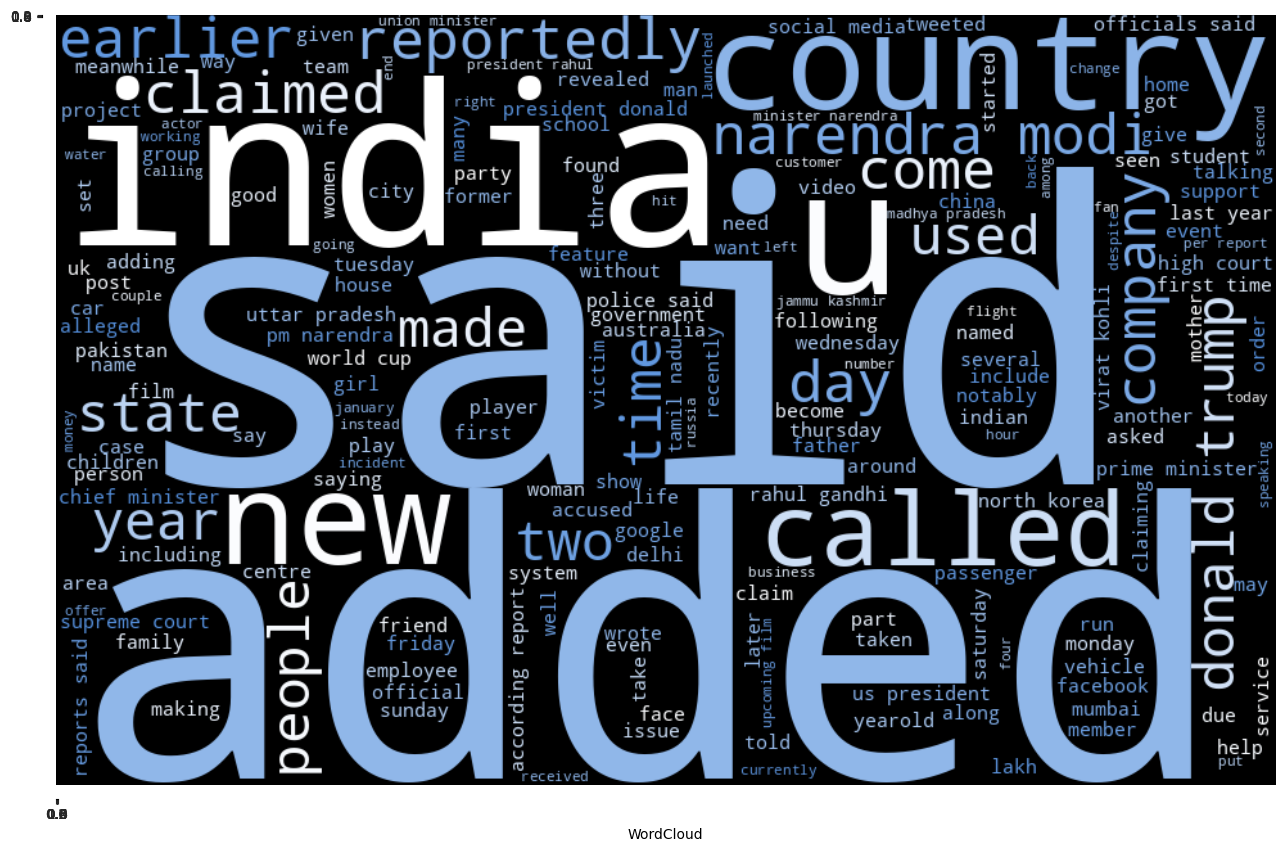

In [ ]:
plot_wordcloud(' '.join(news_data.preprocessed_article.values.tolist()), wc_blue_color_func)

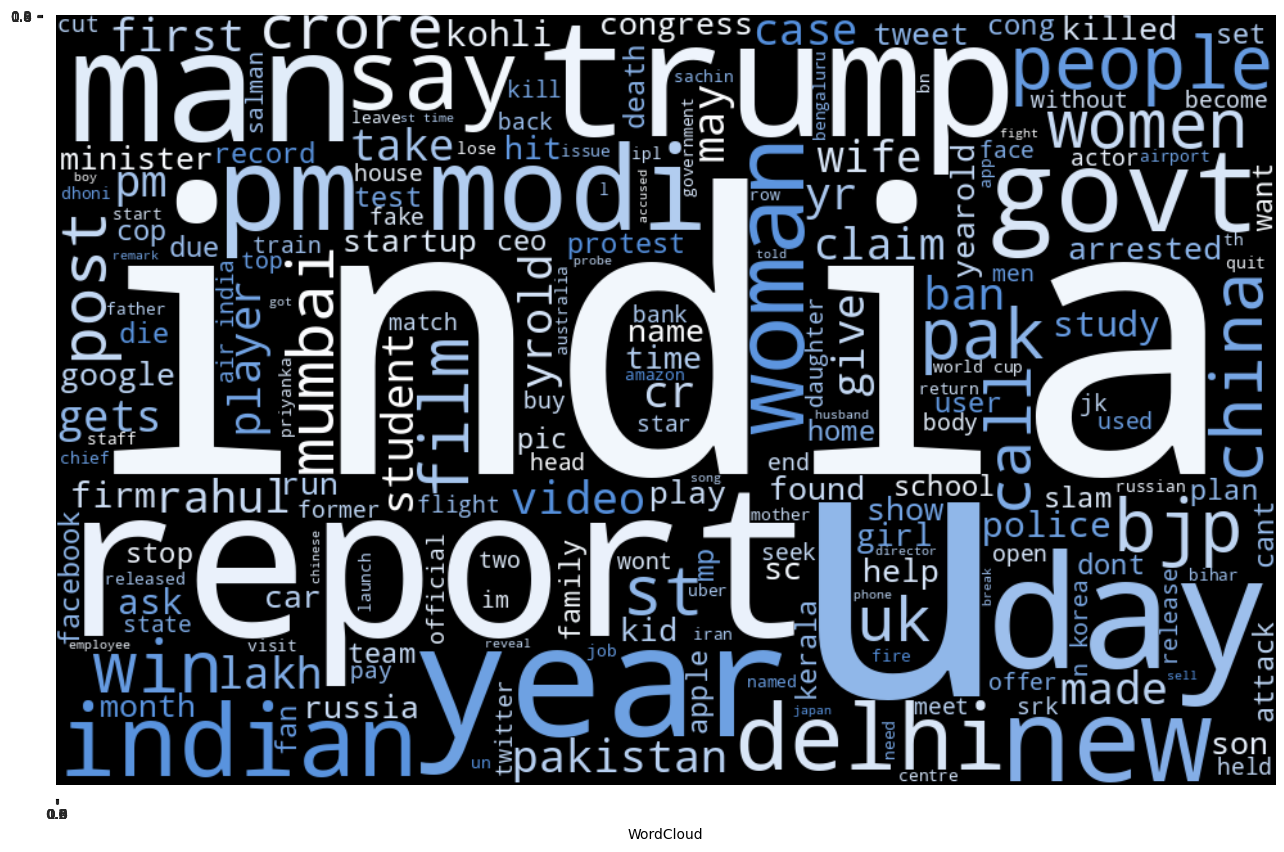

In [ ]:
plot_wordcloud(' '.join(news_data.preprocessed_highlights.values.tolist()), wc_blue_color_func)

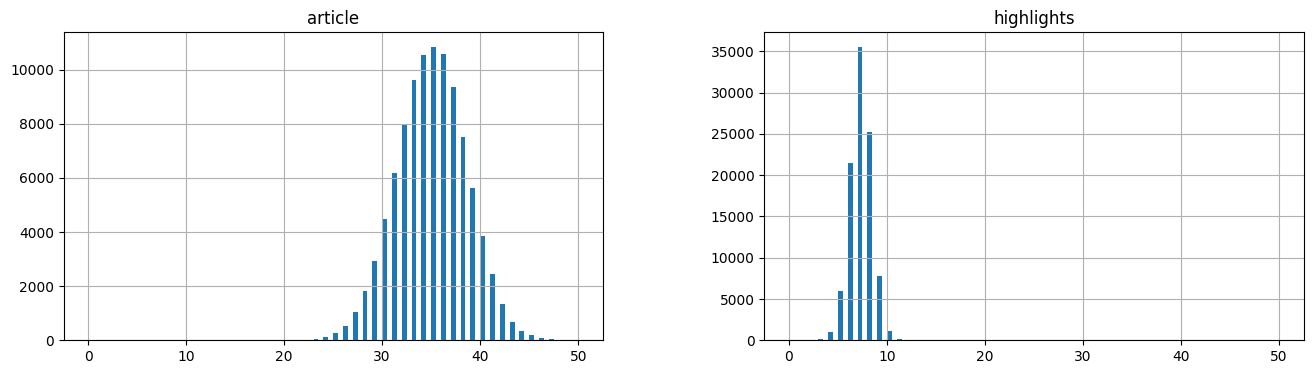

In [ ]:
article_count = [len(sentence.split()) for sentence in news_data.preprocessed_article]
highlights_count = [len(sentence.split()) for sentence in news_data.preprocessed_highlights]

pd.DataFrame({'article': article_count, 'highlights': highlights_count}).hist(bins=100, figsize=(16, 4), range=[0, 50])
plt.show()

In [ ]:
# To check how many rows in a column has length (of the text) <= limit
def get_word_percent(column, limit):
    count = 0
    for sentence in column:
        if len(sentence.split()) <= limit:
            count += 1

    return round(count / len(column), 2)


# Check how many % of headlines have 0-13 words
print(get_word_percent(news_data.preprocessed_highlights, 9))

# Check how many % of summary have 0-42 words
print(get_word_percent(news_data.preprocessed_article ,43))

0.99
0.99


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer

max_words = 10000  # Max number of words to consider in the text
max_len = 100  # Max length of a sequence

# Tokenize the text data
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(news_data['preprocessed_article'])

X_sequences = tokenizer.texts_to_sequences(news_data['preprocessed_article'])
X_padded = pad_sequences(X_sequences, maxlen=max_len)

Y_sequences = tokenizer.texts_to_sequences(news_data['preprocessed_highlights'])
Y_padded = pad_sequences(X_sequences, maxlen=max_len)

from tensorflow.keras.layers import TimeDistributed

# Define the LSTM model for text summarization
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(TimeDistributed(Dense(max_words, activation='softmax')))  # Output probability distribution over vocabulary for each time step

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_padded, Y_padded, test_size=0.2, random_state=42)


In [ ]:
# Train the LSTM model
history = model.fit(X_train_lstm, y_train_lstm, epochs=2, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))

Epoch 1/2
2460/2460 [==============================] - 148s 58ms/step - loss: 1.9264 - accuracy: 0.7675 - val_loss: 0.8933 - val_accuracy: 0.8977
Epoch 2/2
2460/2460 [==============================] - 137s 56ms/step - loss: 0.4897 - accuracy: 0.9444 - val_loss: 0.1890 - val_accuracy: 0.9823


In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_lstm, y_test_lstm)

# Print the test accuracy
print("Test Accuracy:", accuracy)
print("Loss:", loss)

616/616 [==============================] - 18s 29ms/step - loss: 0.1890 - accuracy: 0.9823
Test Accuracy: 0.9822574853897095
Loss: 0.18897651135921478


In [ ]:
# Assuming your model is already trained and stored in the variable `model`

# Function to decode sequences into texts
def decode_sequence(input_seq):
    decoded_texts = []
    for i in range(len(input_seq)):
        input_text = input_seq[i]
        decoded_text = ''
        for token_index in input_text:
            sampled_token_index = np.argmax(token_index)
            sampled_word = tokenizer.index_word.get(sampled_token_index, '')
            if sampled_word != '':
                decoded_text += sampled_word + ' '
        decoded_texts.append(decoded_text.strip())
    return decoded_texts

# Generate summaries for a subset of the dataset
num_samples_to_summarize = 10
X_subset = X_test_lstm[:num_samples_to_summarize]

# Predict summaries using the trained model
predicted_summaries = model.predict(X_subset)

# Decode the predicted sequences into texts
decoded_summaries = decode_sequence(predicted_summaries)

# Print the original articles and their predicted summaries
for i in range(num_samples_to_summarize):
    print("Original Article:", news_data['preprocessed_article'].iloc[i])
    print("Predicted Summary:", decoded_summaries[i])
    print()



1/1 [==============================] - 0s 379ms/step
Original Article: saurav kant alumnus upgrad iiitbs pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrads degree career support helped transition data scientist tech mahindra salary hike upgrads online power learning powered lakh careers
Predicted Summary: students karnataka get extra marks parents cast votes upcoming assembly elections associated management primary secondary schools announced encouraging marks added academic year association said casting votes parents visit member niti voted showing ink mark

Original Article: kunal shahs credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cultfit
Predicted Summary: syrian monday shot missiles two air pace syrias state

In [ ]:
def preprocess_input_text(input_text):
    # Preprocess the input text
    preprocessed_input = preprocess_text(input_text)
    return preprocessed_input

def tokenize_and_pad_input(preprocessed_input_text, tokenizer, max_len):
    # Tokenize and pad the preprocessed input text
    input_sequence = tokenizer.texts_to_sequences([preprocessed_input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_len)
    return padded_input_sequence

def generate_summary(input_text, model, tokenizer, max_len):
    # Preprocess input text
    preprocessed_input = preprocess_input_text(input_text)

    # Tokenize and pad preprocessed input text
    input_sequence = tokenize_and_pad_input(preprocessed_input, tokenizer, max_len)

    # Predict summary using the trained model
    predicted_summary = model.predict(input_sequence)

    # Decode the predicted summary
    decoded_summary = decode_sequence(predicted_summary)

    return decoded_summary[0]  # Return the first (and only) element of the decoded summary list

# Example of how to use the function
Input_Text = "Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. This was due to both the steady increase in computational power (see Moore's law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing."
predicted_summary = generate_summary(Input_Text, model, tokenizer, max_len)
print("Predicted Summary:", predicted_summary)


1/1 [==============================] - 0s 18ms/step
Predicted Summary: natural language processing computer science primarily concerned giving computers dubbed support makeup human language involves processing natural language text speech using either recently machine learning goal computer capable understanding documents including language within technology hurting information contained documents well documents natural language processing systems based complex sets handwritten rules starting late however revolution natural language processing closure machine learning vessels language processing due increase power see law whose sort approach language processing


In [ ]:
# Save the model as a HDF5 file
model.save("/content/drive/My Drive/news summary/lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:


try:
    # Open the pickle file for reading
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer = pickle.load(handle)

    # Now you can use the tokenizer object
    # For example:
    print(tokenizer)

except Exception as e:
    print("Error occurred while loading the tokenizer pickle file:", str(e))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 100, 128)          131584    
                                                                 
 time_distributed (TimeDist  (None, 100, 10000)        1290000   
 ributed)                                                        
                                                                 
Total params: 2701584 (10.31 MB)
Trainable params: 2701584 (10.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import json

# Convert tokenizer to dictionary
tokenizer_config = tokenizer.to_json()

# Define the file path for saving the JSON file
tokenizer_json_path = "/content/drive/My Drive/Minor/tokenizer.json"

# Save the tokenizer configuration as JSON
with open(tokenizer_json_path, 'w', encoding='utf-8') as f:
    json.dump(tokenizer_config, f, ensure_ascii=False, indent=4)

**2.BART**

In [ ]:
!pip install transformers[torch] --upgrade
#pip install accelerate>=0.21.0
!pip install accelerate
#pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 4.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi # Checking GPU

Sat Apr 27 10:28:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install transformers # Installing the transformers library (https://huggingface.co/docs/transformers/index)

In [ ]:
!pip install datasets # Installing the datasets library (https://huggingface.co/docs/datasets/index)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
!pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=5fd5f255ed06bf0cd60f6a6dffa56073097daadc9dd85ea5059400c080a5a01d
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
!pip install evaluate # Installing the evaluate library (https://huggingface.co/docs/evaluate/main/en/index)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Importing Libraries
# Data Handling
from datasets import Dataset, load_metric
import shutil

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Statistics & Mathematics
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro, skew, anderson, kstest, gaussian_kde,spearmanr
import math

# Hiding warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Transformers
from transformers import BartTokenizer, BartForConditionalGeneration      # BAdf1RT Tokenizer and architecture
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments         # These will help us to fine-tune our model
from transformers import pipeline                                         # Pipeline
from transformers import DataCollatorForSeq2Seq                           # DataCollator to batch the data
import torch                                                              # PyTorch
import evaluate                                                           # Hugging Face's library for model evaluation
# Other NLP libraries
from textblob import TextBlob                                             # This is going to help us fix spelling mistakes in texts
from sklearn.feature_extraction.text import TfidfVectorizer               # This is going to helps identify the most common terms in the corpus
import re                                                                 # This library allows us to clean text data
import nltk                                                               # Natural Language Toolkit
nltk.download('punkt')                                                    # This divides a text into a list of sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Configuring Pandas to exhibit larger columns
'''
This is going to allow us to fully read the dialogues and their summary
'''
pd.set_option('display.max_colwidth', 1000)

In [ ]:
# Configuring notebook
seed = 42
paper_color = 'blue'
bg_color = 'black'
colormap = 'cividis'
template = 'plotly_dark'

In [ ]:
# Checking if GPU is available
if torch.cuda.is_available():
    print("GPU is available. \nUsing GPU")
    device = torch.device('cuda')
else:
    print("GPU is not available. \nUsing CPU")
    device = torch.device('cpu')

GPU is available. 
Using GPU


In [ ]:
def display_feature_list(features, feature_type):
    '''
    This function displays the features within each list for each type of data
    '''
    print(f"\n{feature_type} Features: ")
    print(', '.join(features) if features else 'None')

def describe_df(df):
    """
    This function prints some basic info on the dataset and
    sets global variables for feature lists.
    """

    global categorical_features, continuous_features, binary_features
    categorical_features = [col for col in df.columns if df[col].dtype == 'object']
    binary_features = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype != 'object']
    continuous_features = [col for col in df.columns if df[col].dtype != 'object' and col not in binary_features]

    print(f"\n{type(df).__name__} shape: {df.shape}")
    print(f"\n{df.shape[0]:,.0f} samples")
    print(f"\n{df.shape[1]:,.0f} attributes")
    print(f'\nMissing Data: \n{df.isnull().sum()}')
    print(f'\nDuplicates: {df.duplicated().sum()}')
    print(f'\nData Types: \n{df.dtypes}')

    #negative_valued_features = [col for col in df.columns if (df[col] < 0).any()]
    #print(f'\nFeatures with Negative Values: {", ".join(negative_valued_features) if negative_valued_features else "None"}')

    display_feature_list(categorical_features, 'Categorical')
    display_feature_list(continuous_features, 'Continuous')
    display_feature_list(binary_features, 'Binary')

    print(f'\n{type(df).__name__} Head: \n')
    display(df.head(5))
    print(f'\n{type(df).__name__} Tail: \n')
    display(df.tail(5))

In [ ]:
def histogram_boxplot(df,hist_color, box_color, height, width, legend, name):
    '''
    This function plots a Histogram and a Box Plot side by side

    Parameters:
    hist_color = The color of the histogram
    box_color = The color of the boxplots
    heigh and width = Image size
    legend = Either to display legend or not
    '''

    features = df.select_dtypes(include = [np.number]).columns.tolist()

    for feat in features:
        try:
            fig = make_subplots(
                rows=1,
                cols=2,
                subplot_titles=["Box Plot", "Histogram"],
                horizontal_spacing=0.2
            )

            density = gaussian_kde(df[feat])
            x_vals = np.linspace(min(df[feat]), max(df[feat]), 200)
            density_vals = density(x_vals)

            fig.add_trace(go.Scatter(x=x_vals, y = density_vals, mode = 'lines',
                                     fill = 'tozeroy', name="Density", line_color=hist_color), row=1, col=2)
            fig.add_trace(go.Box(y=df[feat], name="Box Plot", boxmean=True, line_color=box_color), row=1, col=1)

            fig.update_layout(title={'text': f'<b>{name} Word Count<br><sup><i>&nbsp;&nbsp;&nbsp;&nbsp;{feat}</i></sup></b>',
                                     'x': .025, 'xanchor': 'left'},
                             margin=dict(t=100),
                             showlegend=legend,
                             template = template,
                             #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                             height=height, width=width
                            )

            fig.update_yaxes(title_text=f"<b>Words</b>", row=1, col=1, showgrid=False)
            fig.update_xaxes(title_text="", row=1, col=1, showgrid=False)

            fig.update_yaxes(title_text="<b>Frequency</b>", row=1, col=2,showgrid=False)
            fig.update_xaxes(title_text=f"<b>Words</b>", row=1, col=2, showgrid=False)

            fig.show()
            print('\n')
        except Exception as e:
            print(f"An error occurred: {e}")

In [ ]:
def plot_correlation(df, title, subtitle, height, width, font_size):
    '''
    This function is resposible to plot a correlation map among features in the dataset.

    Parameters:
    height = Define height
    width = Define width
    font_size = Define the font size for the annotations
    '''
    corr = np.round(df.corr(numeric_only = True), 2)
    mask = np.triu(np.ones_like(corr, dtype = bool))
    c_mask = np.where(~mask, corr, 100)

    c = []
    for i in c_mask.tolist()[1:]:
        c.append([x for x in i if x != 100])



    fig = ff.create_annotated_heatmap(z=c[::-1],
                                      x=corr.index.tolist()[:-1],
                                      y=corr.columns.tolist()[1:][::-1],
                                      colorscale = colormap)

    fig.update_layout(title = {'text': f"<b>{title} Heatmap<br><sup>&nbsp;&nbsp;&nbsp;&nbsp;<i>{subtitle}</i></sup></b>",
                                'x': .025, 'xanchor': 'left', 'y': .95},
                    margin = dict(t=210, l = 110),
                    yaxis = dict(autorange = 'reversed', showgrid = False),
                    xaxis = dict(showgrid = False),
                    template = template,
                    #plot_bgcolor=bg_color,paper_bgcolor=paper_color,
                    height = height, width = width)


    fig.add_trace(go.Heatmap(z = c[::-1],
                             colorscale = colormap,
                             showscale = True,
                             visible = False))
    fig.data[1].visible = True

    for i in range(len(fig.layout.annotations)):
        fig.layout.annotations[i].font.size = font_size

    fig.show()

In [ ]:
def compute_tfidf(df_column, ngram_range=(1,1), max_features=15):
    vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english', ngram_range=ngram_range)
    x = vectorizer.fit_transform(df_column.fillna(''))
    df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())
    return df_tfidfvect

Exploring the dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/news_final1_bart.csv')

In [ ]:
# Extracting info on the training Dataframe
describe_df(df)


DataFrame shape: (79999, 2)

79,999 samples

2 attributes

Missing Data: 
highlights    0
article       0
dtype: int64

Duplicates: 19

Data Types: 
highlights    object
article       object
dtype: object

Categorical Features: 
highlights, article

Continuous Features: 
None

Binary Features: 
None

DataFrame Head: 



highlights  \
0    upGrad learner switches to career in ML & Al with 90% salary hike   
1         Delhi techie wins free food from Swiggy for one year on CRED   
2     New Zealand end Rohit Sharma-led India's 12-match winning streak   
3             Aegon life iTerm insurance plan helps customers save tax   
4  Have known Hirani for yrs, what if MeToo claims are not true: Sonam   

                                                                                                                                                                                                                                                                                                                                                                                   article  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.  
1                              Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.  
2                 New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history.  
3                               With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢Â‚Â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.  
4       Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment," she added. Hirani has been accused by an assistant who worked in 'Sanju'.


DataFrame Tail: 



highlights  \
79994    Govt has scrapped 1,200 laws for startups: NITI Aayog CEO   
79995  Irfan Pathan slammed for posting 'un-Islamic' pic with wife   
79996  Ladies golf body slammed after ban on deep necklines, minis   
79997               HTC accidentally shows ads on phone's keyboard   
79998                  BSP chief Mayawati resigns from Rajya Sabha   

                                                                                                                                                                                                                                                                                                                                                                                                   article  
79994                                    NITI Aayog CEO Amitabh Kant has said the government has scrapped around 1,200 complex laws for easy registration of startups to encourage entrepreneurs. "Today one can register a company in a day and for an MSME, it takes around five minutes to register," he added. Kant also explained that entrepreneurship has to be promoted to create wealth in India.  
79995                          Indian all-rounder Irfan Pathan was slammed on social media after he posted a picture of himself with his wife Safa Baig, which was termed "un-Islamic" by many. Users commented that Safa's arms and face should have been covered with a veil. Earlier, pacer Mohammed Shami was subjected to similar treatment after he posted his wife's picture in a sleeveless dress.  
79996                                    The Ladies Professional Golf Association has been criticised by former players for enforcing a dress code that bans plunging necklines, short skirts that reveal the "bottom area", leggings, among other attire. The LPGA said the new code was in place so that "players present themselves in a professional manner to reflect a positive image for the game."  
79997  Taiwanese electronics company HTC has admitted that it has accidentally been showing ads within the default keyboard app 'TouchPal' on some of its smartphones. HTC has asked users to uninstall TouchPal's updates, and the keyboard's developer has claimed that a server issue led to the unwanted advertisements. "This is absolutely not the experience we intended," said HTC in a statement.  
79998                                                                   BSP chief Mayawati on Tuesday resigned as a Member of Parliament in Rajya Sabha. Hours earlier, she had threatened to quit claiming that she was not being allowed to speak in the House. "If I'm not able to put forward the concerns of my weaker section in the Parliament, I don't have the right to stay," Mayawati had said.

In [ ]:
mask = df['article'].isnull() # Creating mask with null dialogues
filtered_df = df[mask] # filtering dataframe

In [ ]:
df = df.dropna() # removing null values

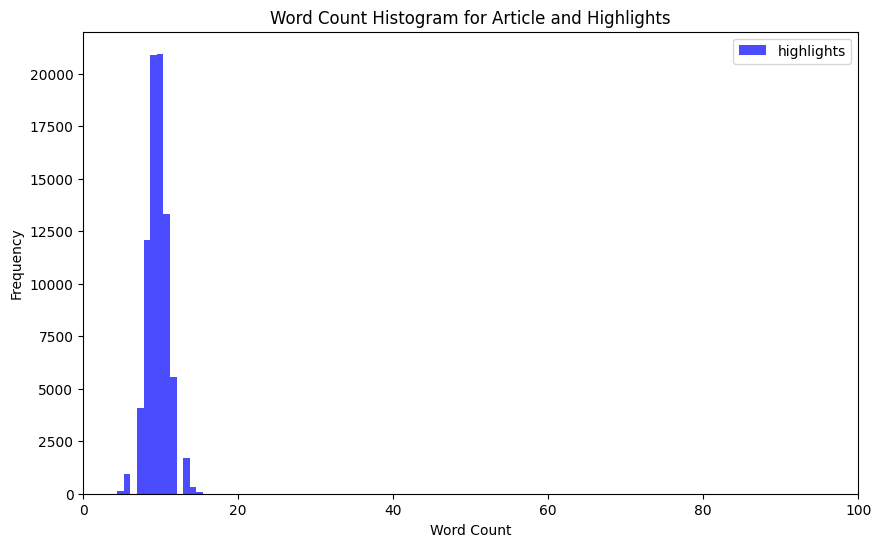

In [ ]:
import matplotlib.pyplot as plt

def histogram(df, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, highlights in enumerate(df.columns):
        plt.hist(df[highlights], bins=20, color='#0000FF', alpha=0.7, label=highlights)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
df_text_length = pd.DataFrame() # Creating an empty dataframe
#df_text_length['article'] = df['article'].apply(lambda x: len(str(x).split())) # Word count for article
df_text_length['highlights'] = df['highlights'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(df_text_length, '#0000FF', 0, 100, 'Word Count Histogram for Article and Highlights')

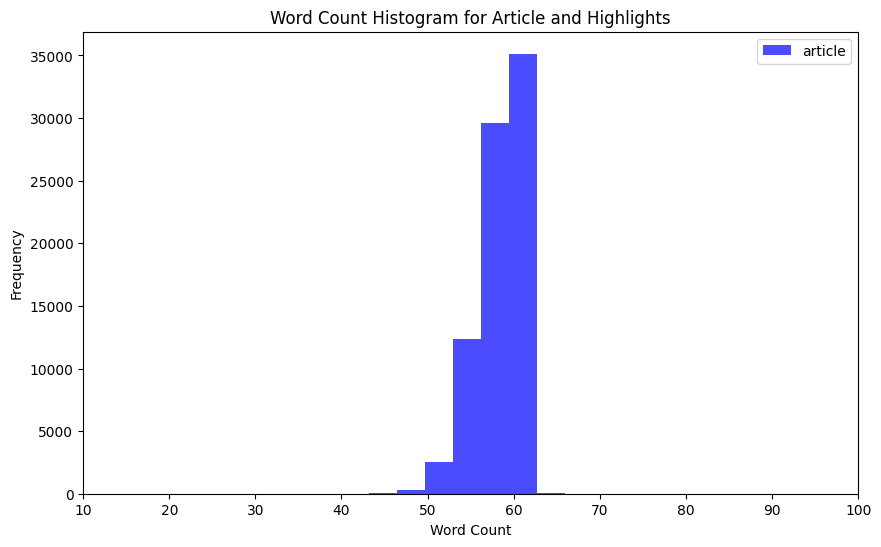

In [ ]:
def histogram(df, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, article in enumerate(df.columns):
        plt.hist(df[article], bins=20, color='#0000FF', alpha=0.7, label=article)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
df_text_length = pd.DataFrame() # Creating an empty dataframe
df_text_length['article'] = df['article'].apply(lambda x: len(str(x).split())) # Word count for article
#df_text_length['highlights'] = df['highlights'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(df_text_length, '#0000FF', 10, 100, 'Word Count Histogram for Article and Highlights')

In [ ]:
df.head()

highlights  \
0    upGrad learner switches to career in ML & Al with 90% salary hike   
1         Delhi techie wins free food from Swiggy for one year on CRED   
2     New Zealand end Rohit Sharma-led India's 12-match winning streak   
3             Aegon life iTerm insurance plan helps customers save tax   
4  Have known Hirani for yrs, what if MeToo claims are not true: Sonam   

                                                                                                                                                                                                                                                                                                                                                                                   article  
0  Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.  
1                              Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.  
2                 New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history.  
3                               With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢Â‚Â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.  
4       Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment," she added. Hirani has been accused by an assistant who worked in 'Sanju'.

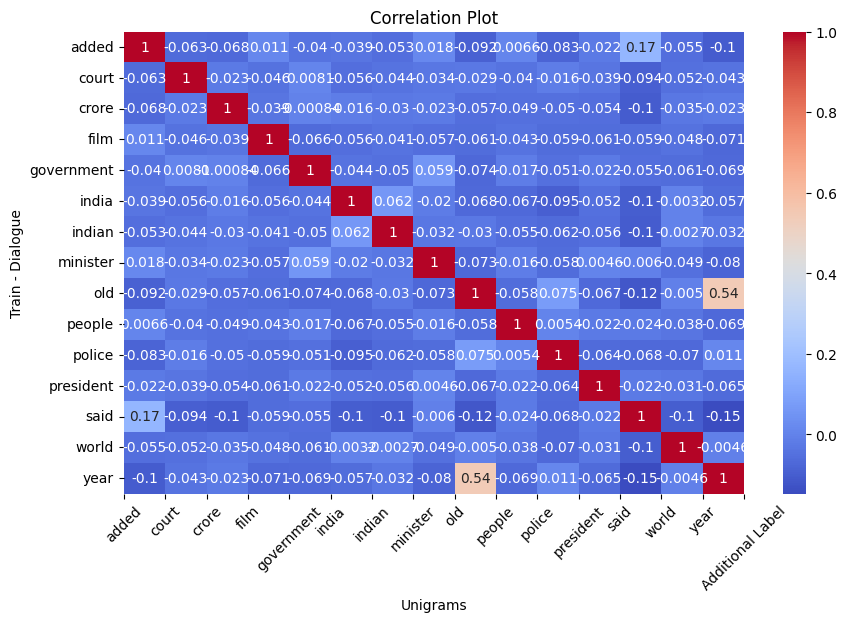

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating a sample DataFrame
#df = pd.DataFrame({'article': ['this is article 1', 'this is article 2', 'this is article 3'],
                   #'highlights': ['highlight 1', 'highlight 2', 'highlight 3']})

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(df['article'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Unigrams', 'Train - Dialogue', x, 1, 8)

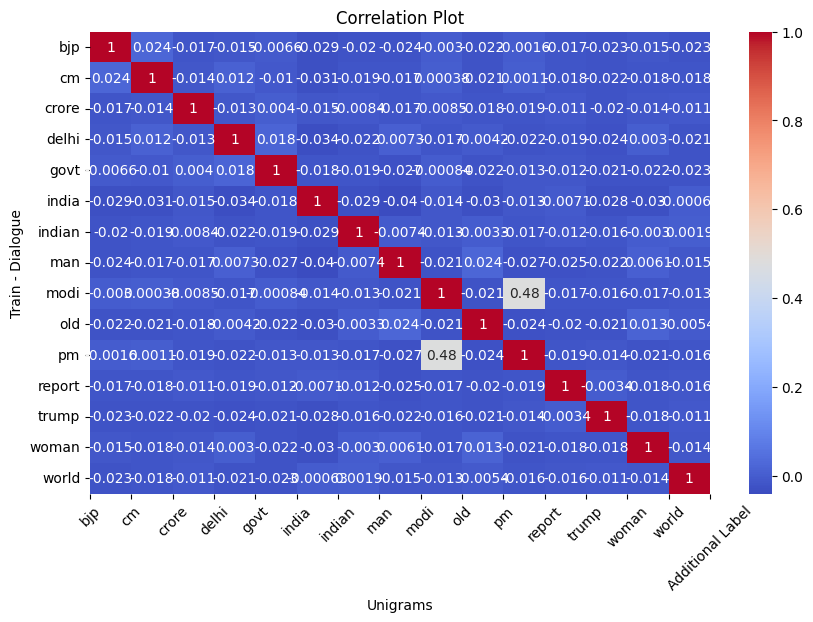

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating a sample DataFrame
#df = pd.DataFrame({'article': ['this is article 1', 'this is article 2', 'this is article 3'],
                   #'highlights': ['highlight 1', 'highlight 2', 'highlight 3']})

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(df['highlights'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Unigrams', 'Train - Dialogue', x, 1, 8)

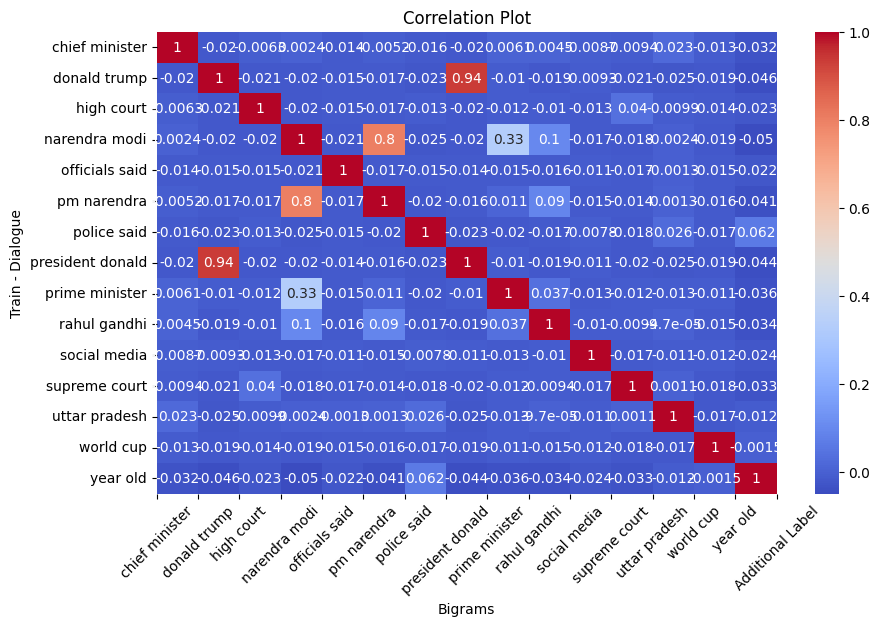

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))

# Transforming the 'highlights' column
x = vectorizer.fit_transform(df['article'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Bigrams', 'Train - Dialogue', x, 1, 8)


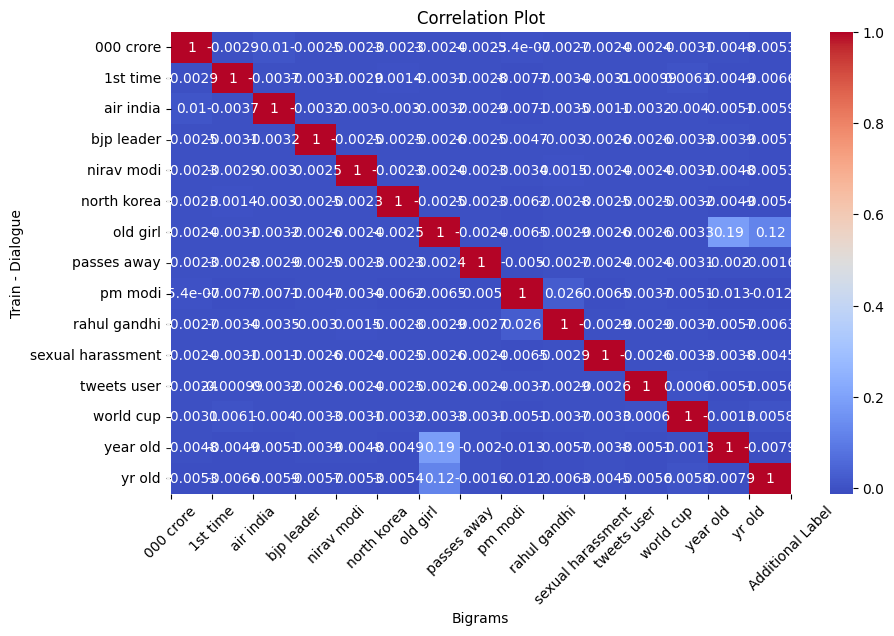

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))

# Transforming the 'highlights' column
x = vectorizer.fit_transform(df['highlights'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Bigrams', 'Train - Dialogue', x, 1, 8)


In [ ]:
# Filtering dataset to see those containing the term 'btech' in the summary
filtered_train = df[df['highlights'].str.contains('btech', case=False, na=False)]
filtered_train.head()

highlights  \
1485             IIT Hyderabad to launch India's first BTech course in AI   
17885  BTech student fakes robbery, steals dad's Ã¢Â‚Â¹4 lakh to open gym   
39470       Wrote BTech exams while students took selfies with me: Kartik   
47144   7 BTech graduates had accused Choksi of Ã¢Â‚Â¹1.5cr fraud in 2017   

                                                                                                                                                                                                                                                                                                                                                                                                            article  
1485   IIT Hyderabad is launching a full-fledged BTech program in Artificial Intelligence (AI) from the coming academic year 2019-20. The institute claims it has become India's first educational institution to do so, and likely the third globally besides Carnegie Mellon University and Massachusetts Institute of Technology (MIT). The course will enrol around 20 students through the JEE-Advanced exam.   
17885                                                             Police have arrested a 23-year-old BTech student in Uttar Pradesh's Noida for allegedly staging a robbery to steal Ã¢Â‚Â¹4 lakh belonging to his father to finance a gym. The accused had claimed that while bringing money from his uncle in Loni, he was robbed by several men. However, police found out that he gave the money to his friend.  
39470                                                                    Kartik Aaryan has revealed he wrote his BTech exams while other students were taking selfies with him. He added that this happened while he was shooting for the sequel to his debut film 'Pyaar Ka Punchnama'. "My mother wanted me to have that degree. You can say aaj main padha likha sirf unhi ki wajah se hu," Kartik further said.  
47144                                  A group of seven BTech graduates had moved a Delhi court accusing Gitanjali Gems MD Mehul Choksi of Ã¢Â‚Â¹1.5-crore fraud in 2017. They had planned to open a Gitanjali Jewels retail franchise and were allegedly given damaged diamonds and gems against a security deposit of Ã¢Â‚Â¹1.5 crore. Notably, Choksi is one of the prime accused in the $1.77-billion PNB scam.

In [ ]:
# Assuming df is your DataFrame
# Find rows with missing values
rows_with_missing_values = df[df.isna().any(axis=1)]

# Display rows with missing values
print(rows_with_missing_values)

Empty DataFrame
Columns: [highlights, article]
Index: []


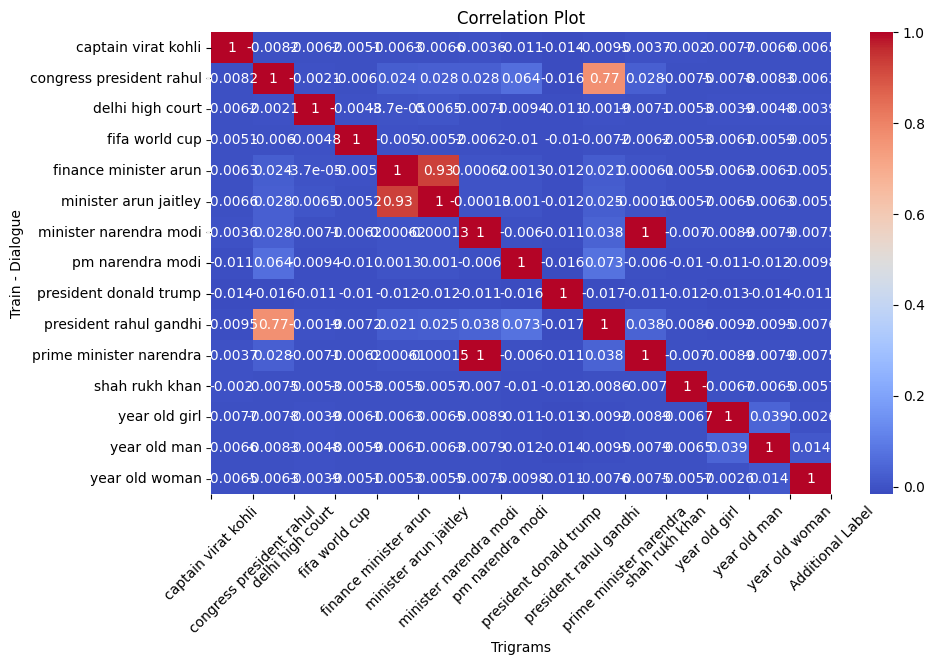

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(df['article'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Trigrams', 'Train - Dialogue', x)


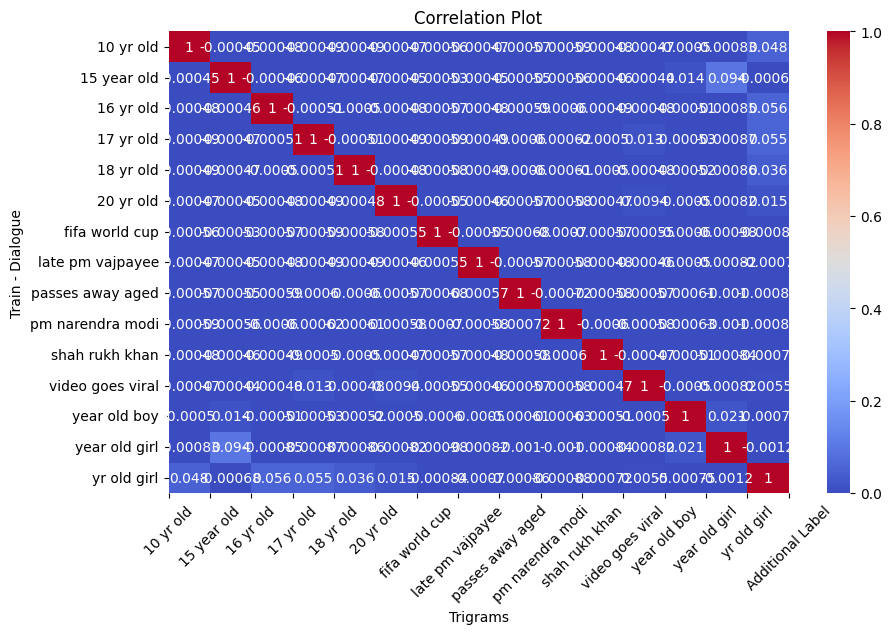

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(df, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(df['highlights'])

# Creating DataFrame from transformed data
df_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(df_tfidfvect, 'Trigrams', 'Train - Dialogue', x)


# *Test Data*

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/news_summary2_bart.csv')

In [ ]:
test.drop(columns=['author','date','read_more','ctext'], inplace=True)

In [ ]:
# Extracting info on the test dataset
describe_df(test)


DataFrame shape: (4517, 2)

4,517 samples

2 attributes

Missing Data: 
highlights    2
article       2
dtype: int64

Duplicates: 1

Data Types: 
highlights    object
article       object
dtype: object

Categorical Features: 
highlights, article

Continuous Features: 
None

Binary Features: 
None

DataFrame Head: 



highlights  \
0  Daman & Diu revokes mandatory Rakshabandhan in offices order   
1  Malaika slams user who trolled her for 'divorcing rich man'    
2          'Virgin' now corrected to 'Unmarried' in IGIMS' form   
3      Aaj aapne pakad liya: LeT man Dujana before being killed   
4  Hotel staff to get training to spot signs of sex trafficking   

                                                                                                                                                                                                                                                                                                                                                                                                          article  
0                                          The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.  
1                                       Malaika Arora slammed an Instagram user who trolled her for "divorcing a rich man" and "having fun with the alimony". "Her life now is all about wearing short clothes, going to gym or salon, enjoying vacation[s]," the user commented. Malaika responded, "You certainly got to get your damn facts right before spewing sh*t on me...when you know nothing about me."  
2  The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna on Thursday made corrections in its Marital Declaration Form by changing 'Virgin' option to 'Unmarried'. Earlier, Bihar Health Minister defined virgin as being an unmarried woman and did not consider the term objectionable. The institute, however, faced strong backlash for asking new recruits to declare their virginity in the form.  
3                                Lashkar-e-Taiba's Kashmir commander Abu Dujana, who was killed by security forces, said "Kabhi hum aage, kabhi aap, aaj aapne pakad liya, mubarak ho aapko (Today you caught me. Congratulations)" after being caught. He added that he won't surrender, and whatever is in his fate will happen to him. "Hum nikley they shaheed hone (had left home for martyrdom)," he added.  
4                                  Hotels in Maharashtra will train their staff to spot signs of sex trafficking, including frequent requests for bed linen changes and 'Do not disturb' signs left on room doors for days. A mobile phone app called Rescue Me, which will allow staff to alert police of suspicious behaviour, will be developed. The initiative has been backed by the Maharashtra government.


DataFrame Tail: 



highlights  \
4512   Rasna seeking ?250 cr revenue from snack category: Chairman   
4513      Sachin attends Rajya Sabha after questions on attendance   
4514   Shouldn't rob their childhood: Aamir on kids reality shows    
4515       Asha Bhosle gets ?53,000 power bill for unused bungalow   
4516  More than half of India's languages may die in 50yrs: Survey   

                                                                                                                                                                                                                                                                                                                                                                                                  article  
4512                            Fruit juice concentrate maker Rasna is eyeing a revenue of ?250 crore in the next three years from the snack category, Chairman Piruz Khambatta said. Rasna, which has presence in the sweet snack category with its brand Vitos, is planning to introduce ethnic and western snacks. Notably, Rasna enjoys an 85% market share in the ?1,000 crore powdered drink space.  
4513                           Former Indian cricketer Sachin Tendulkar attended the Rajya Sabha a couple of days after Samajwadi Party MP Naresh Agrawal asked him and actress Rekha to resign from their positions due to their low attendance. Among the 12 nominated members, Sachin and veteran actress Rekha were found to be among the worst performers in terms of attendance in the Rajya Sabha.  
4514                                    Aamir Khan, while talking about reality shows on television that feature kids, said that these shows shouldn't be so aggressive that they rob children of their childhood. "I haven't seen those reality shows...it cuts both ways. There are kids who are talented and want to be out there to show their talent, it (reality shows) gives them an opportunity."  
4515  The Maharashtra government has initiated an inquiry after 83-year-old singer Asha Bhosle complained of receiving an electricity bill of over ?53,000 for her unused bungalow in Lonawala. The state electricity department is investigating the unit consumption and will amend the bill if necessary. Bhosle claims of receiving similar bills in the past for the bungalow that is mostly locked.  
4516                                       At least 400 languages or more than half languages spoken by India's 1.3 billion people may die out in next 50 years, a study by the People's Linguistic Survey of India (PSLI) stated. Further claiming that India has already lost 250 languages in last five decades, the survey said, "Each time a language is lost, the corresponding culture is killed."

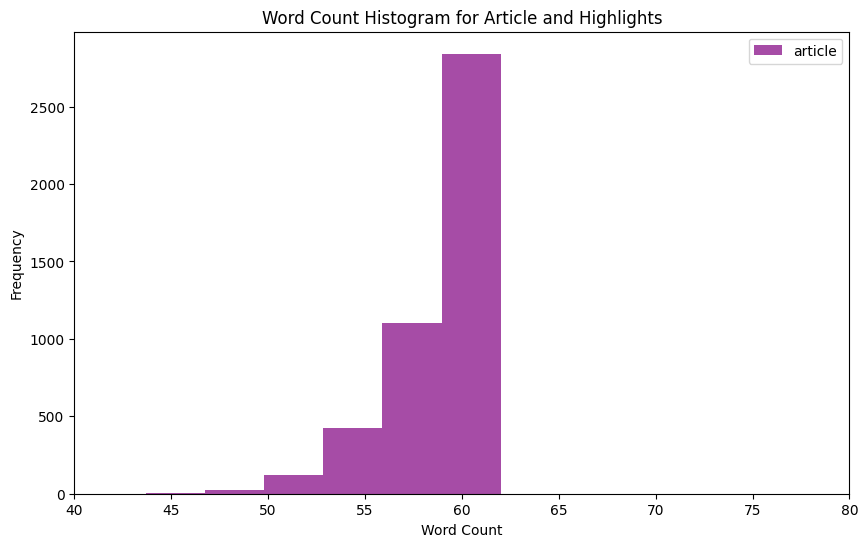

In [ ]:
def histogram(test, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, article in enumerate(test.columns):
        plt.hist(test[article], bins=20, color='#800080', alpha=0.7, label=article)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
test_text_length = pd.DataFrame() # Creating an empty dataframe
test_text_length['article'] = test['article'].apply(lambda x: len(str(x).split())) # Word count for article
#df_text_length['highlights'] = df['highlights'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(test_text_length, '#800080', 40, 80, 'Word Count Histogram for Article and Highlights')

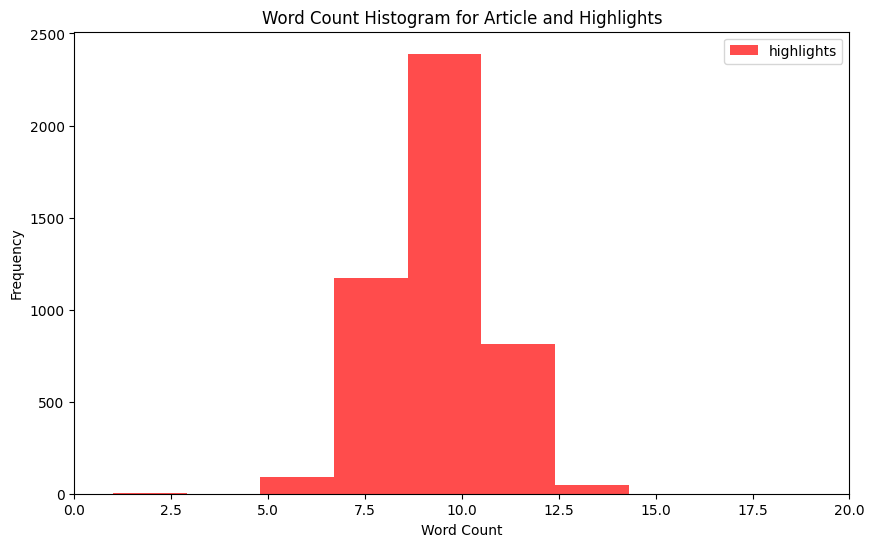

In [ ]:
def histogram(test, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, highlights in enumerate(test.columns):
        plt.hist(test[highlights], bins=20, color='#FF0000', alpha=0.7, label=highlights)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
test_text_length = pd.DataFrame() # Creating an empty dataframe
#test_text_length['article'] = test['article'].apply(lambda x: len(str(x).split())) # Word count for article
test_text_length['highlights'] = test['highlights'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(test_text_length, '#FF0000', 0, 20, 'Word Count Histogram for Article and Highlights')

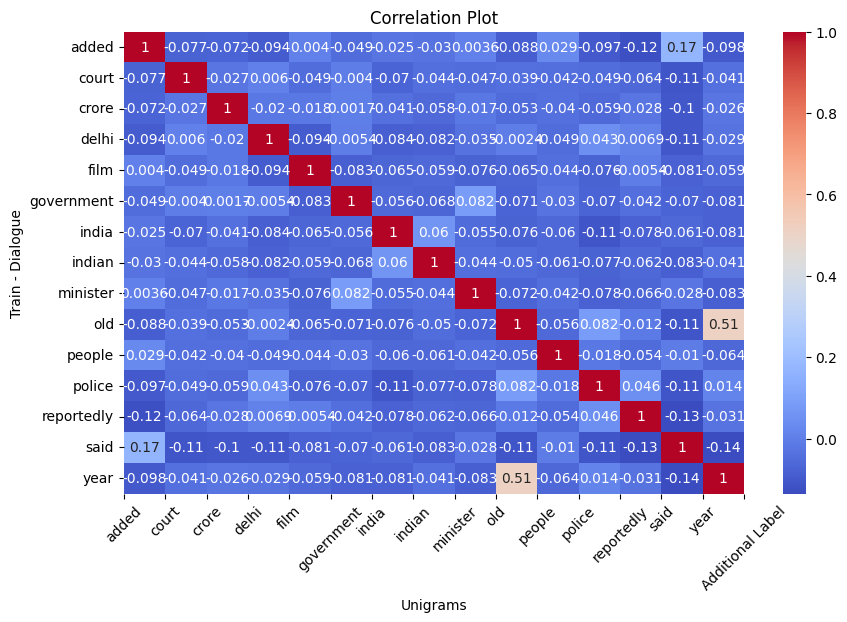

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(test['article'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Unigrams', 'Train - Dialogue', x, 1, 8)

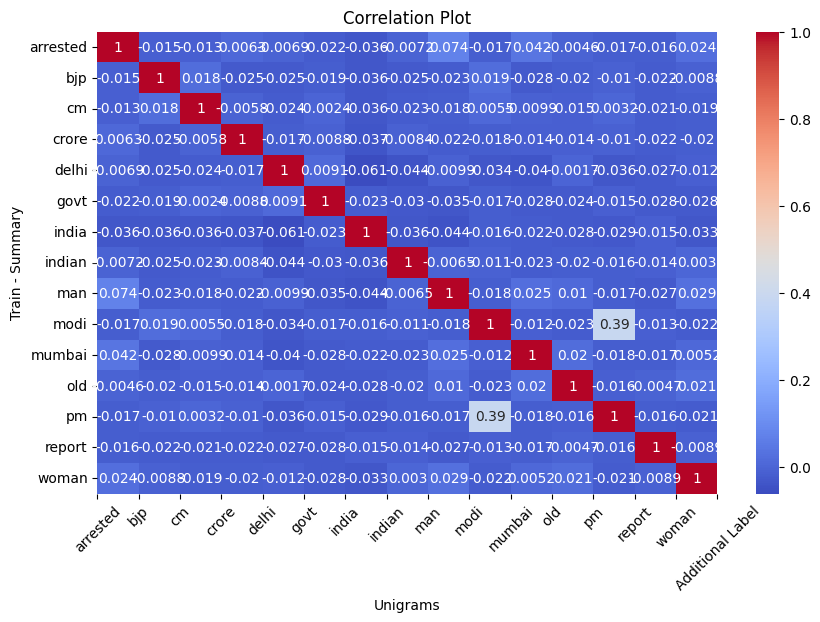

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(test['highlights'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Unigrams', 'Train - Summary', x, 1, 8)

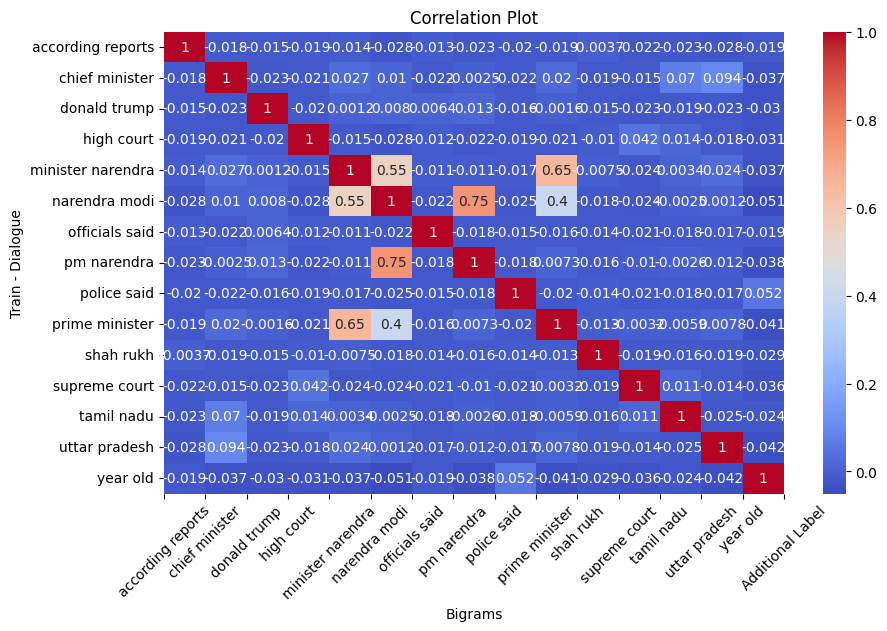

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))

# Transforming the 'article' column
x = vectorizer.fit_transform(test['article'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Bigrams', 'Train - Dialogue', x)


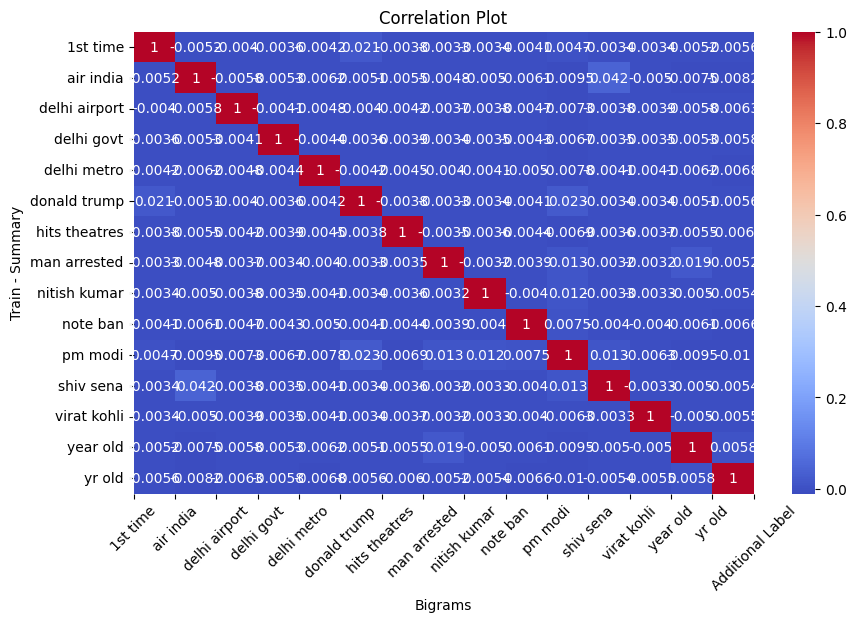

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(2, 2))

# Transforming the 'article' column
x = vectorizer.fit_transform(test['highlights'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Bigrams', 'Train - Summary', x)


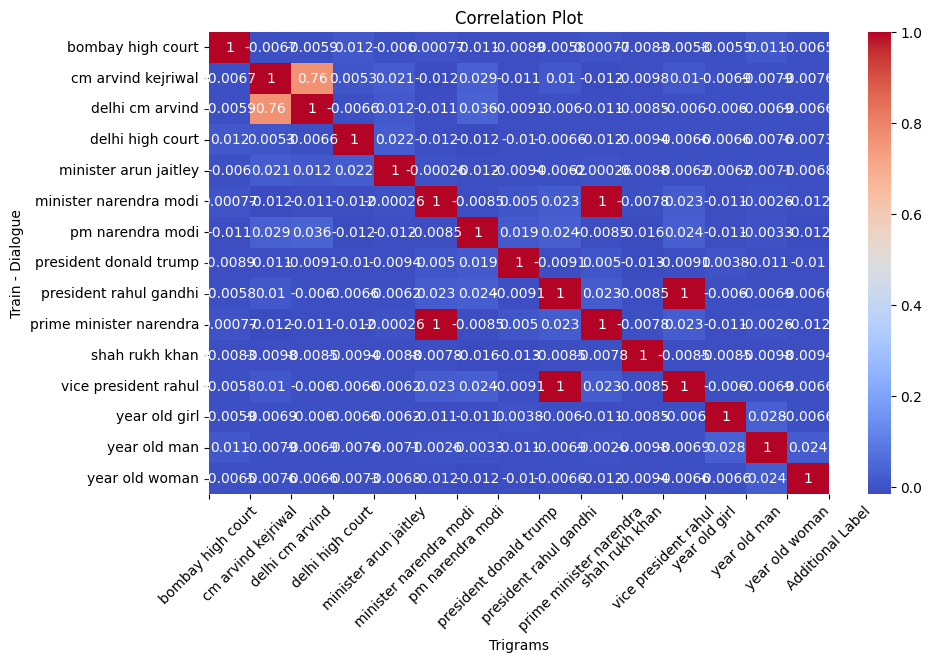

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(test['article'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Trigrams', 'Train - Dialogue', x)


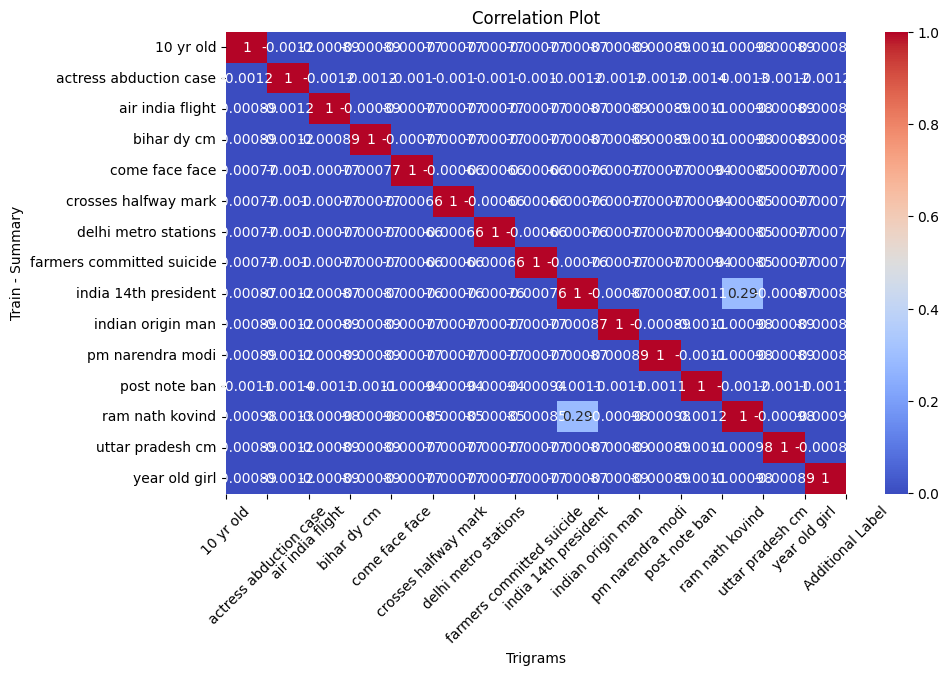

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(test, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(test.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
test.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(test['highlights'])

# Creating DataFrame from transformed data
test_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(test_tfidfvect, 'Trigrams', 'Train - Summary', x)

# *Validation Data*

In [ ]:
val = pd.read_csv('/content/drive/MyDrive/val_final.csv')

In [ ]:
describe_df(val)


DataFrame shape: (499, 2)

499 samples

2 attributes

Missing Data: 
highlights    0
article       0
dtype: int64

Duplicates: 0

Data Types: 
highlights    object
article       object
dtype: object

Categorical Features: 
highlights, article

Continuous Features: 
None

Binary Features: 
None

DataFrame Head: 



highlights  \
0                                                                                                                                         Experts question if  packed out planes are putting passengers at risk .\nU.S consumer advisory group says minimum space must be stipulated .\nSafety tests conducted on planes with more leg room than airlines offer .   
1                                                                                                                                             Drunk teenage boy climbed into lion enclosure at zoo in west India .\nRahul Kumar, 17, ran towards animals shouting 'Today I kill a lion!'\nFortunately he fell into a moat before reaching lions and was rescued .   
2                                                                                                                                               Nottingham Forest are close to extending Dougie Freedman's contract .\nThe Forest boss took over from former manager Stuart Pearce in February .\nFreedman has since lead the club to ninth in the Championship .   
3                                                                                          Fiorentina goalkeeper Neto has been linked with Liverpool and Arsenal .\nNeto joined FiroentinaÂ from Brazilian outfit Atletico Paranaense in 2011 .\nHe is also wanted by PSG and Spanish clubs, according to his agent .\nCLICK HERE for the latest Liverpool news .   
4  Tell-all interview with the reality TV star, 69, will air on Friday April 24 .\nIt comes amid continuing speculation about his transition to a woman and following his involvement in a deadly car crash in February .\nThe interview will also be one of Diane Sawyer's first appearances on television following the sudden death of her husband last year .   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   article  
0  Ever noticed how plane seats appear to be getting smaller and smaller? With increasing numbers of people taking to the skies, some experts are questioning if having such packed out planes is putting passengers at risk. They say that the shrinking space on aeroplanes is not only uncomfortable - it's putting our health and safety in danger. More than squabbling over the arm rest, shrinking space on planes putting our health and safety in danger? This week, a U.S consumer advisory group set up by the Department of Transportation said at a public hearing that while the government is happy to set standards for animals flying on planes, it doesn't stipulate a minimum amount of space for humans. 'In a world where animals have more rights to space and food than humans,' said Charlie Leocha, consumer representative on the committee.Â 'It is time that the DOT and FAA take a stand for humane treatment of passengers.' But could crowding on planes lead to more serious issues than fighting for s...  
1  A drunk teenage boy had to be rescued by security after jumping into a lions' enclosure at a zoo in western India. Rahul Kumar, 17, clambered over the enclosure fence at theÂ Kamla Nehru 


DataFrame Tail: 



highlights  \
494                                                                                                                                                                                                                                                       A piece of space history is going up for auction in New York this month .\nIt is a bloodstained checklist from the Gemini 4 mission in 1965 .\nThis spacecraft orbited Earth 66 times with two astronauts on board .\nBlood came from astronaut's hand while trying to close the hatch in space .   
495                                                                                                                                                                                                                                                                                                                                                    Chelsea scored late winner to beat QPR 1-0 at Loftus Road on Sunday .\nCesc Fabregas scored with Chelsea's only shot on target .\nChelsea move seven points clear at the top of the Premier League .   
496                                                                                                                                                                                            Jacob King has been identified as man who stood up to anti-Islam protester with swastika tattooed behind his ear .\nIn a photo of Mr King holding his arms out and going toe-to-toe with aggressor was snapped by Kenji Wardenclyffe .\nThe anti-racism protester told Daily Mail Australia he had asked the neo-Nazi to back down and not fight his group .   
497  Steven Carl Day's confession over drinks that he molested young girls led to his murder, Robert Mccombs, theÂ roommateÂ of the alleged murder testified .\nMccombs said that when Day confessed to he and his former roommate Roger Musick that Musick said he wanted to kill Day .\nMccombs claims that Musick strangled Day to death and that the two of him dumped his body and then hid the evidence .\nMccombs was released from prison in early March for tamperingÂ with evidence in Day's death but Musick will stand trial for Day's murder .   
498                                                                                                                                                                                                                                                      Real Madrid beat Granada 9-1, with Cristiano Ronaldo scoring five goals .\nThe Portuguese forward now has 36 goals this season in La Liga .\nThat league tally is more than the totals for 53 of Europe's top 98 teams .\nNine teams in the Barclays Premier League have fewer goals this season .   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     article  
494  A bloodstained document revealing a life-or-death episode that could have derailed the whole US space programme of the 1960s is tipped to sell for Â£80,000 ($120,000). The splatters of blood on the checklist for the very first US spacewalk were from an astro

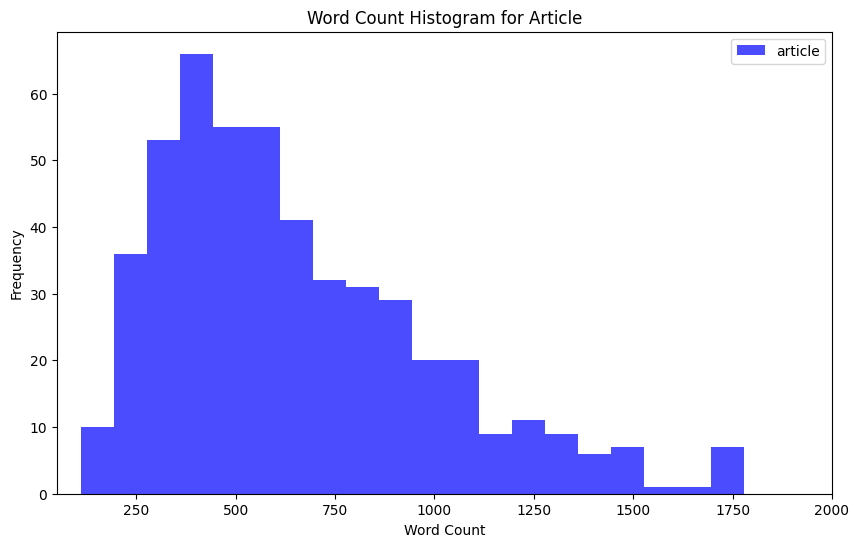

In [ ]:
def histogram(val, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, article in enumerate(val.columns):
        plt.hist(val[article], bins=20, color='#0000FF', alpha=0.7, label=article)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
val_text_length = pd.DataFrame() # Creating an empty dataframe
#df_text_length['article'] = df['article'].apply(lambda x: len(str(x).split())) # Word count for article
val_text_length['article'] = val['article'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(val_text_length, '#0000FF', 50, 2000, 'Word Count Histogram for Article')

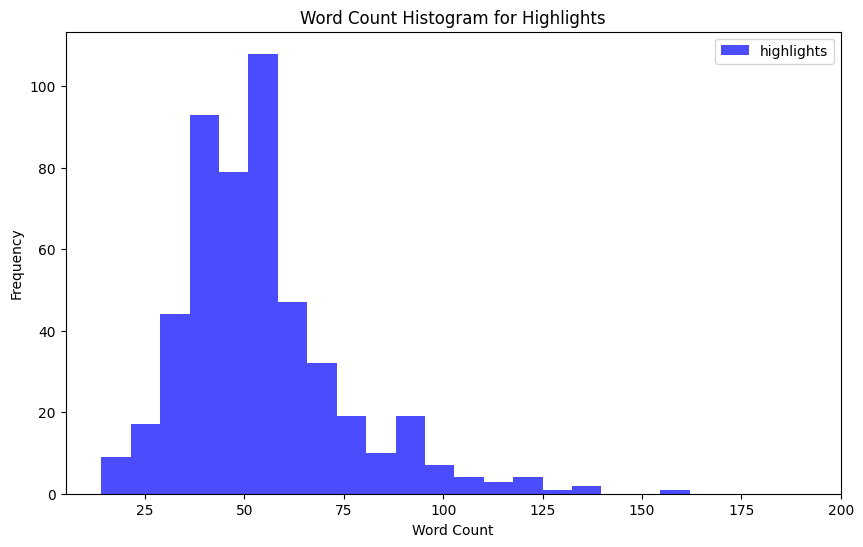

In [ ]:
def histogram(val, colors, min_val, max_val, title):
    plt.figure(figsize=(10, 6))
    for i, highlights in enumerate(val.columns):
        plt.hist(val[highlights], bins=20, color='#0000FF', alpha=0.7, label=highlights)
    plt.title(title)
    plt.xlabel('Word Count')
    plt.ylabel('Frequency')
    plt.xlim(min_val, max_val)
    plt.legend()
    plt.show()

# Assuming df is your DataFrame containing "article" and "highlights" columns
val_text_length = pd.DataFrame() # Creating an empty dataframe
#df_text_length['article'] = df['article'].apply(lambda x: len(str(x).split())) # Word count for article
val_text_length['highlights'] = val['highlights'].apply(lambda x: len(str(x).split())) # Word count for highlights
# Define colors for article and highlights
#colors = ['#0000FF', '#FF0000']

# Plotting histogram
histogram(val_text_length, '#0000FF', 5, 200, 'Word Count Histogram for Highlights')

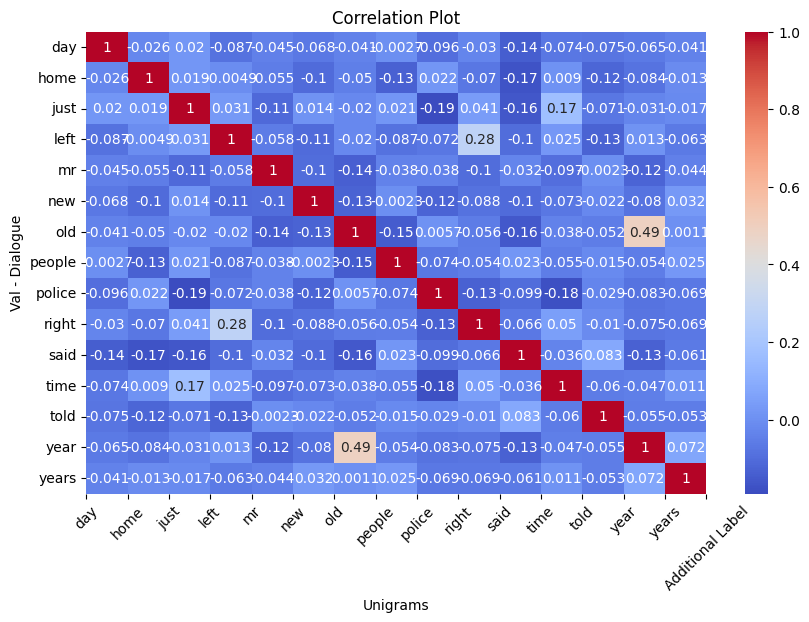

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
val.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(val['article'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Unigrams', 'Val - Dialogue', x, 1, 8)

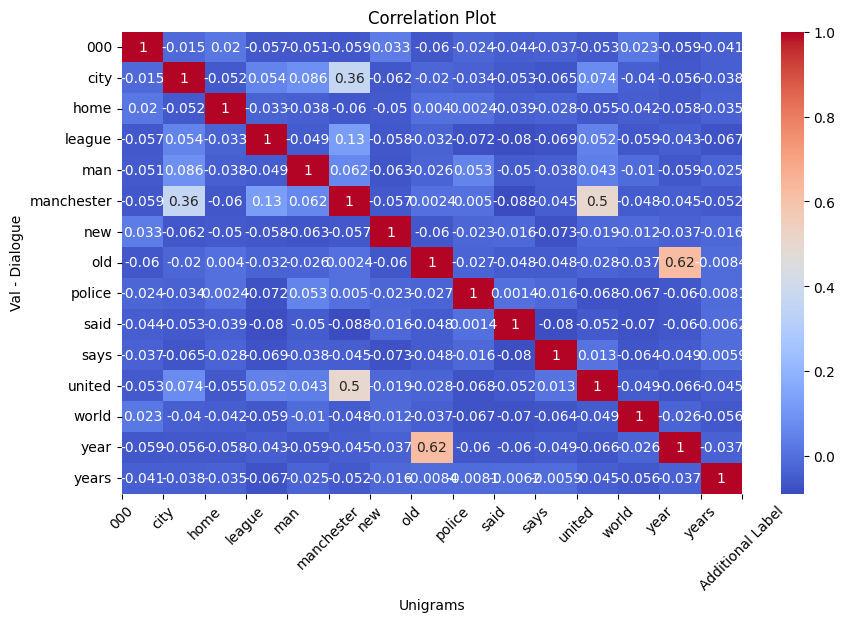

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
val.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=15, stop_words='english')

# Transforming the 'article' column
x = vectorizer.fit_transform(val['highlights'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Unigrams', 'Val - Dialogue', x, 1, 8)

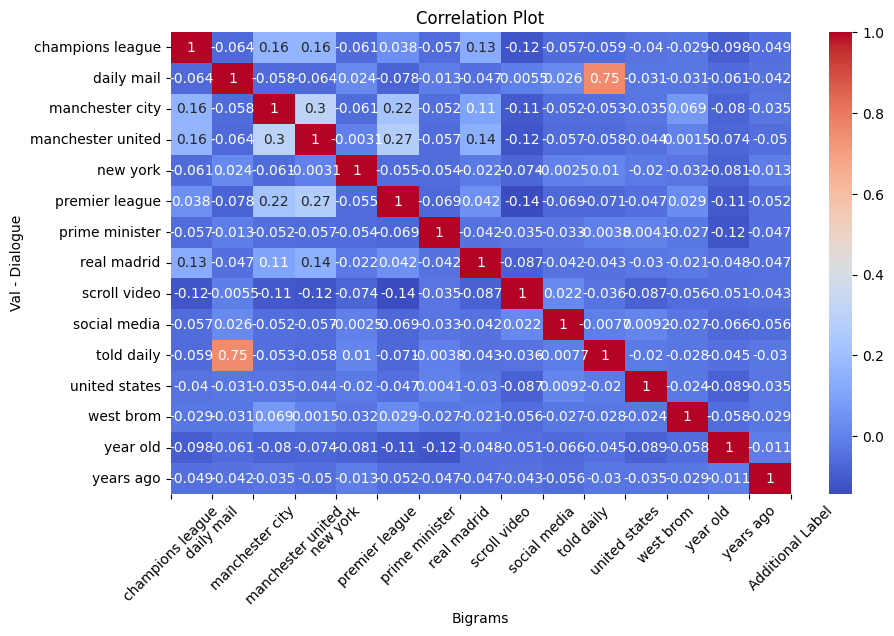

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'highlights' column and drop them
val.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=15, stop_words='english')

# Transforming the 'highlights' column
x = vectorizer.fit_transform(val['article'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Bigrams', 'Val - Dialogue', x, 1, 8)


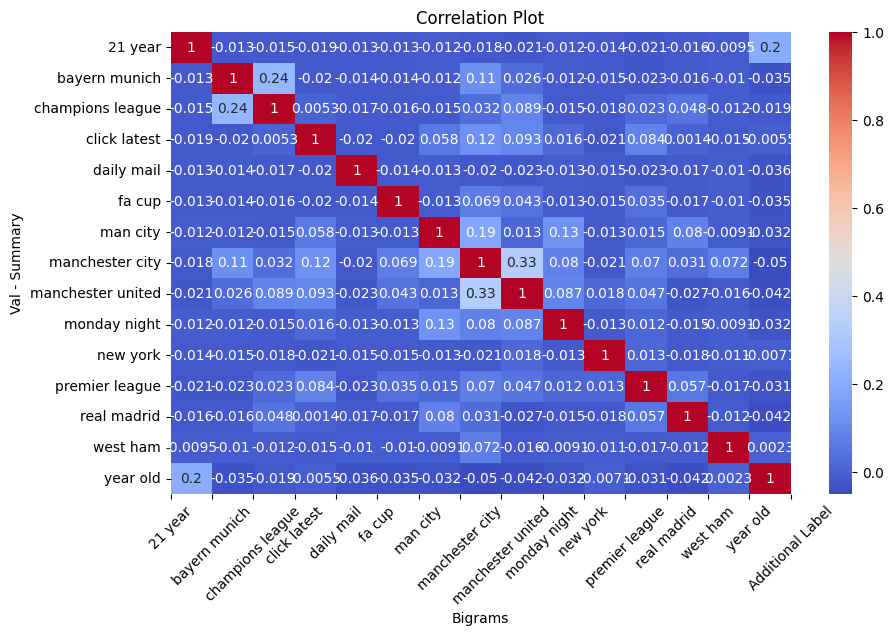

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks, nrows, ncols):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'highlights' column and drop them
val.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer for bigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=15, stop_words='english')

# Transforming the 'highlights' column
x = vectorizer.fit_transform(val['highlights'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Bigrams', 'Val - Summary', x, 1, 8)


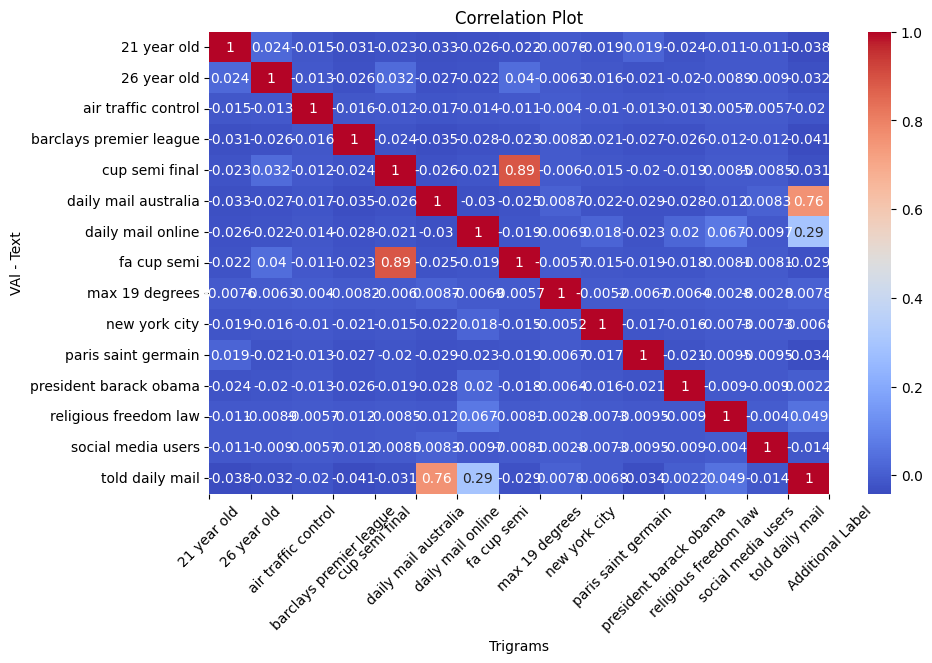

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
val.dropna(subset=['article'], inplace=True)

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(val['article'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Trigrams', 'VAl - Text', x)

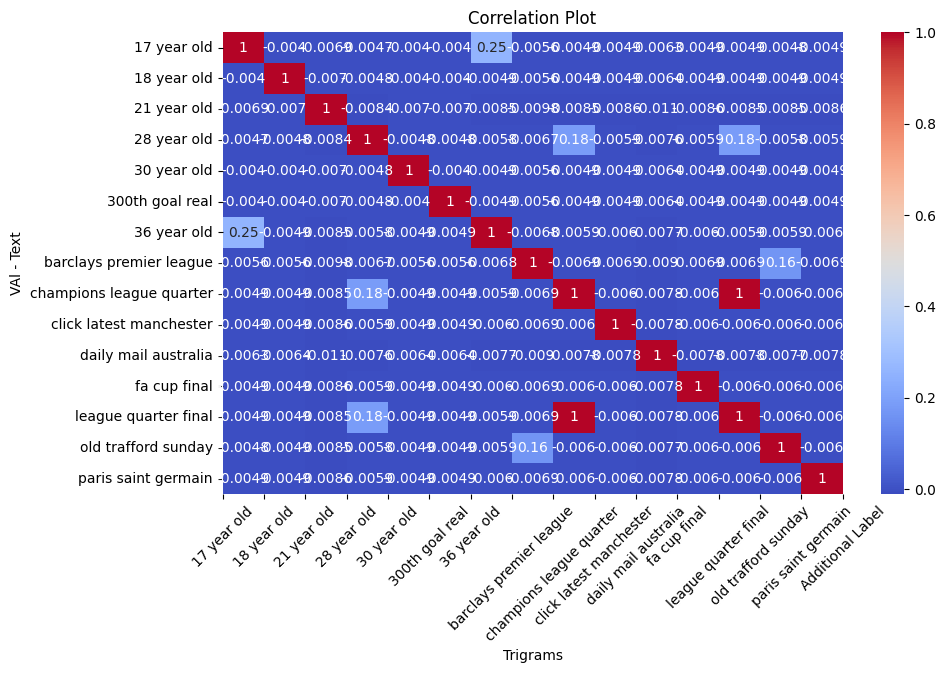

In [ ]:
# Define a simple plot_correlation function for demonstration
def plot_correlation(val, xlabel, ylabel, xticks):
    plt.figure(figsize=(10, 6))
    sns.heatmap(val.corr(), annot=True, cmap='coolwarm')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=45)
    plt.title('Correlation Plot')
    plt.show()

# Check for missing values in 'article' column and drop them
val.dropna(subset=['highlights'], inplace=True)

# Creating the TfidfVectorizer for trigrams
vectorizer = TfidfVectorizer(max_features=15, stop_words='english', ngram_range=(3, 3))

# Transforming the 'article' column
x = vectorizer.fit_transform(val['highlights'])

# Creating DataFrame from transformed data
val_tfidfvect = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Get feature names and append "Additional Label"
x = vectorizer.get_feature_names_out().tolist()
x.append("Additional Label")

# Plotting correlation
plot_correlation(val_tfidfvect, 'Trigrams', 'VAl - Text', x)

Preprocessing Data

In [ ]:
def clean_tags(text):
    clean = re.compile('<.*?>') # Compiling tags
    clean = re.sub(clean, '', text) # Replacing tags text by an empty string

    # Removing empty dialogues
    clean = '\n'.join([line for line in clean.split('\n') if not re.match('.*:\s*$', line)])

    return clean

In [ ]:
test1 = clean_tags(df['article'].iloc[14727]) # Applying function to example text
test2 = clean_tags(test['article'].iloc[0]) # Applying function to example text

# Printing results
print(test1)
print('\n')
print(test2)

The Delhi government's Sentence Review Board has rejected an early release plea of Sushil Sharma who is serving life imprisonment for killing his wife and trying to dispose her body by burning it in a tandoor. It also rejected a plea of  Santosh Singh who is serving life imprisonment for 1996 rape and murder of law student Priyadarshini Mattoo.


The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The administration was forced to withdraw the decision within 24 hours of issuing the circular after it received flak from employees and was slammed on social media.


In [ ]:
# Defining function to clean every text in the dataset.
def clean_df(df, cols):
    for col in cols:
        df[col] = df[col].fillna('').apply(clean_tags)
    return df

In [ ]:
# Cleaning texts in all datasets
df = clean_df(df,['article', 'highlights'])
test = clean_df(test,['article', 'highlights'])
val = clean_df(val,['article', 'highlights'])

In [ ]:
df.tail(3) # Visualizing results

highlights  \
79996  Ladies golf body slammed after ban on deep necklines, minis   
79997               HTC accidentally shows ads on phone's keyboard   
79998                  BSP chief Mayawati resigns from Rajya Sabha   

                                                                                                                                                                                                                                                                                                                                                                                                   article  
79996                                    The Ladies Professional Golf Association has been criticised by former players for enforcing a dress code that bans plunging necklines, short skirts that reveal the "bottom area", leggings, among other attire. The LPGA said the new code was in place so that "players present themselves in a professional manner to reflect a positive image for the game."  
79997  Taiwanese electronics company HTC has admitted that it has accidentally been showing ads within the default keyboard app 'TouchPal' on some of its smartphones. HTC has asked users to uninstall TouchPal's updates, and the keyboard's developer has claimed that a server issue led to the unwanted advertisements. "This is absolutely not the experience we intended," said HTC in a statement.  
79998                                                                   BSP chief Mayawati on Tuesday resigned as a Member of Parliament in Rajya Sabha. Hours earlier, she had threatened to quit claiming that she was not being allowed to speak in the House. "If I'm not able to put forward the concerns of my weaker section in the Parliament, I don't have the right to stay," Mayawati had said.

In [ ]:
# Transforming dataframes into datasets
df_ds = Dataset.from_pandas(df)
test_ds = Dataset.from_pandas(test)
val_ds = Dataset.from_pandas(val)

# Visualizing results
print(df_ds)
print('\n')
print(test_ds)
print('\n')
print(val_ds)

Dataset({
    features: ['highlights', 'article'],
    num_rows: 79999
})


Dataset({
    features: ['highlights', 'article', '__index_level_0__'],
    num_rows: 4515
})


Dataset({
    features: ['highlights', 'article'],
    num_rows: 499
})


In [ ]:
df_ds[0] # Visualizing the first row

{'highlights': 'upGrad learner switches to career in ML & Al with 90% salary hike',
 'article': "Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."}

**Modelling**

In [ ]:
# Loading summarization pipeline with the bart-large-cnn model
summarizer = pipeline('summarization', model = 'facebook/bart-large-xsum')

config.json:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
news = '''Bobi, the world’s oldest dog ever, has died after reaching the almost inconceivable age of 31 years and 165 days, said Guinness World Records (GWR) on Monday.
His death at an animal hospital on Friday was initially announced by veterinarian Dr. Karen Becker.
She wrote on Facebook that “despite outliving every dog in history, his 11,478 days on earth would never be enough, for those who loved him.”
There were many secrets to Bobi’s extraordinary old age, his owner Leonel Costa told GWR in February. He always roamed freely, without a leash or chain, lived in a “calm, peaceful” environment and ate human food soaked in water to remove seasonings, Costa said.
He spent his whole life in Conqueiros, a small Portuguese village about 150 kilometers (93 miles) north of the capital Lisbon, often wandering around with cats.
Bobi was a purebred Rafeiro do Alentejo – a breed of livestock guardian dog – according to his owner. Rafeiro do Alentejos have a life expectancy of about 12-14 years, according to the American Kennel Club.
But Bobi lived more than twice as long as that life expectancy, surpassing an almost century-old record to become the oldest living dog and the oldest dog ever – a title which had previously been held by Australian cattle-dog Bluey, who was born in 1910 and lived to be 29 years and five months old.
However, Bobi’s story almost had a different ending.
When he and his three siblings were born in the family’s woodshed, Costa’s father decided they already had too many animals at home.
Costa and his brothers thought their parents had taken all the puppies away to be destroyed. However, a few sad days later, they found Bobi alive, safely hidden in a pile of logs.
The children hid the puppy from their parents and, by the time Bobi’s existence became known, he was too old to be put down and went on to live his record-breaking life.
His 31st birthday party in May was attended by more than 100 people and a performing dance troupe, GWR said.
His eyesight deteriorated and walking became harder as Bobi grew older but he still spent time in the backyard with the cats, rested more and napped by the fire.
“Bobi is special because looking at him is like remembering the people who were part of our family and unfortunately are no longer here, like my father, my brother, or my grandparents who have already left this world,” Costa told GWR in May. “Bobi represents those generations.”
'''
summarizer(news) # Using the pipeline to generate a summary of the text above

[{'summary_text': 'The world’s oldest dog has died, Guinness World Records has confirmed.'}]

In [ ]:
checkpoint = 'facebook/bart-large-xsum' # Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer

In [ ]:
model = BartForConditionalGeneration.from_pretrained(checkpoint) # Loading Model

In [ ]:
print(model) # Visualizing model's architecture

BartForConditionalGeneration(
  (model): BartModel(
    (shared): Embedding(50264, 1024, padding_idx=1)
    (encoder): BartEncoder(
      (embed_tokens): Embedding(50264, 1024, padding_idx=1)
      (embed_positions): BartLearnedPositionalEmbedding(1026, 1024)
      (layers): ModuleList(
        (0-11): 12 x BartEncoderLayer(
          (self_attn): BartSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_norm): La

In [ ]:
def preprocess_function(examples):
    inputs = [doc for doc in examples['article']]
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    # Setup the tokenizer for targets
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['highlights'], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
# Applying preprocess_function to the datasets
tokenized_train = df_ds.map(preprocess_function, batched=True,
                               remove_columns=['highlights', 'article']) # Removing features

tokenized_test = test_ds.map(preprocess_function, batched=True,
                               remove_columns=['highlights','article']) # Removing features

tokenized_val = val_ds.map(preprocess_function, batched=True,
                               remove_columns=['highlights','article']) # Removing features

# Printing results
print('\n')
print('Preprocessed Training Dataset:\n')
print(tokenized_train)
print('\n')
print('Preprocessed Test Dataset:\n')
print(tokenized_test)
print('\n')
print('Preprocessed Validation Dataset:\n')
print(tokenized_val)

Map:   0%|          | 0/79999 [00:00<?, ? examples/s]

Map:   0%|          | 0/4515 [00:00<?, ? examples/s]

Map:   0%|          | 0/499 [00:00<?, ? examples/s]



Preprocessed Training Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 79999
})


Preprocessed Test Dataset:

Dataset({
    features: ['__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 4515
})


Preprocessed Validation Dataset:

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 499
})


In [ ]:
# Selecting a sample from the dataset
sample = tokenized_train[0]

# Printing its features
print("input_ids:")
print(sample['input_ids'])
print("\n")
print("attention_mask:")
print(sample['attention_mask'])
print("\n")
print("sample:")
print(sample['labels'])
print("\n")

input_ids:
[0, 104, 8616, 1469, 25340, 6, 41, 1076, 24422, 687, 9, 62, 44908, 8, 3082, 2068, 12, 387, 18, 14499, 4928, 11, 14969, 2239, 8, 27332, 6558, 6, 21, 10, 8482, 5778, 24379, 23, 7412, 366, 2459, 19, 818, 195, 107, 9, 173, 676, 4, 20, 586, 8, 62, 44908, 18, 10253, 12, 5743, 756, 323, 1147, 123, 3868, 7, 10, 5423, 37774, 23, 4569, 3634, 2028, 763, 19, 1814, 207, 5391, 5960, 4, 62, 44908, 18, 5855, 3029, 13807, 34, 8852, 155, 8305, 2744, 8478, 4, 2]


attention_mask:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


sample:
[0, 658, 44908, 38401, 1396, 21737, 7, 756, 11, 10725, 359, 726, 19, 1814, 207, 5391, 5960, 2]




In [ ]:
# Instantiating Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [ ]:
metric = load_metric('rouge') # Loading ROUGE Score

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred# Obtaining predictions and true labels

    # Decoding predictions
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)

    # Obtaining the true labels tokens, while eliminating any possible masked token (i.e., label = -100)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Rouge expects a newline after each sentence
    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]


    # Computing rouge score
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value.mid.fmeasure * 100 for key, value in result.items()} # Extracting some results

    # Add mean-generated length
    prediction_lens = [np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions]
    result["gen_len"] = np.mean(prediction_lens)

    return {k: round(v, 4) for k, v in result.items()}

In [ ]:
!pip install transformers[torch]
!pip install accelerate
# Defining parameters for training
'''
Please don't forget to check the documentation.
Both the Seq2SeqTrainingArguments and Seq2SeqTrainer classes have quite an extensive list of parameters.
doc: https://huggingface.co/docs/transformers/v4.34.1/en/main_classes/trainer
'''
training_args = Seq2SeqTrainingArguments(
    output_dir = 'bart_samsum',
    evaluation_strategy = "epoch",
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'eval_loss',
    seed = seed,
    learning_rate=2e-5,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=1,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

In [ ]:
# Defining Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)


# *Model Training*

In [ ]:
trainer.train()   # Training model

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=10000, training_loss=1.035185647583008, metrics={'train_runtime': 4861.4839, 'train_samples_per_second': 16.456, 'train_steps_per_second': 2.057, 'total_flos': 1.5525202975236096e+16, 'train_loss': 1.035185647583008, 'epoch': 1.0})

# *Model Saving after 1st epoch and Second Epoch Running*

In [ ]:
output_dir = "/content/drive/MyDrive/MAJOR"

In [ ]:
# Save the model's weights
model.save_pretrained(output_dir)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


In [ ]:
# Save the model's architecture (config)
model.config.save_pretrained(output_dir)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the directory path in your Google Drive where you want to save the model
drive_save_directory = "/content/drive/MyDrive/MAJOR"

# Create the directory if it doesn't exist
import os
os.makedirs(drive_save_directory, exist_ok=True)

# Define paths to save the model and tokenizer within the Google Drive directory
model_save_path_drive = os.path.join(drive_save_directory, "model")
tokenizer_save_path_drive = os.path.join(drive_save_directory, "tokenizer")

# Save the model and tokenizer after the first epoch to Google Drive
model.save_pretrained(model_save_path_drive)
tokenizer.save_pretrained(tokenizer_save_path_drive)

In [ ]:
# Define another epoch for training
training_args.num_train_epochs = 1
#Train for the second epoch
trainer.train()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].


TrainOutput(global_step=10000, training_loss=0.8029568603515626, metrics={'train_runtime': 4763.0211, 'train_samples_per_second': 16.796, 'train_steps_per_second': 2.1, 'total_flos': 1.5525202975236096e+16, 'train_loss': 0.8029568603515626, 'epoch': 1.0})

In [ ]:
output_dir = "/content/drive/MyDrive/MAJOR/saved_model1"

In [ ]:
# Save the model's architecture (H5 format)
model.save_pretrained(output_dir, save_function=torch.save)

# Save the model's weights (Pickle format)
#weights_file = "/content/saved_model1/model_weights.pkl"
weights_file = "/content/drive/MyDrive/MAJOR/saved_model1/model_weights.pkl"
torch.save(model.state_dict(), weights_file)

# Optionally, save the tokenizer
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-xsum")
tokenizer.save_pretrained(output_dir)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


('/content/drive/MyDrive/MAJOR/saved_model1/tokenizer_config.json',
 '/content/drive/MyDrive/MAJOR/saved_model1/special_tokens_map.json',
 '/content/drive/MyDrive/MAJOR/saved_model1/vocab.json',
 '/content/drive/MyDrive/MAJOR/saved_model1/merges.txt',
 '/content/drive/MyDrive/MAJOR/saved_model1/added_tokens.json')

In [ ]:
# Save the model's architecture (config)
model.config.save_pretrained(output_dir)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [ ]:
# Evaluating model performance on the tokenized validation dataset
validation = trainer.evaluate(eval_dataset = tokenized_val)
print(validation) # Printing results

{'eval_loss': 9.029708862304688, 'eval_rouge1': 19.7274, 'eval_rouge2': 6.1313, 'eval_rougeL': 15.0381, 'eval_rougeLsum': 17.7672, 'eval_gen_len': 20.5651, 'eval_runtime': 235.3359, 'eval_samples_per_second': 2.12, 'eval_steps_per_second': 0.531, 'epoch': 1.0}


In [ ]:
# Saving model to a custom directory
directory = "/content/drive/MyDrive/MAJOR"
trainer.save_model(directory)

# Saving model tokenizer
tokenizer.save_pretrained(directory)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 62, 'min_length': 11, 'early_stopping': True, 'num_beams': 6, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


('/content/drive/MyDrive/MAJOR/tokenizer_config.json',
 '/content/drive/MyDrive/MAJOR/special_tokens_map.json',
 '/content/drive/MyDrive/MAJOR/vocab.json',
 '/content/drive/MyDrive/MAJOR/merges.txt',
 '/content/drive/MyDrive/MAJOR/added_tokens.json')

In [ ]:
# Loading summarization pipeline and model
summarizer = pipeline('summarization', model = 'luisotorres/bart-finetuned-samsum')

config.json:   0%|          | 0.00/1.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.31k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/999k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

In [ ]:
# Obtaining a random example from the validation dataset
val_ds[35]

{'highlights': 'Pit crew member Todd Phillips was hit by a car on Sunday during the inaugural IndyCar Grand Prix of Louisiana .\nHeÂ\xa0wasÂ\xa0injuredÂ\xa0when he was struck by the car of Francesco Dracone, who hadÂ\xa0come in on Lap 25 for tires and fuel .\nPhillips received stitches for a cut on his leg and has been released .\nDracone did not finish the race and wound up 23rd .',
 'article': "This is the stomach-churning moment a pit crew worker is tossed into the air like a rag doll as he's hit by an out-of-control racing car. Surveillance footage shows 40-year-old Todd Phillips being struck at full speed as he flags down one of his drivers  during Sunday's inaugural Indy Grand Prix of Louisiana. As the Dale Coyne Racing teamÂ\xa0chief mechanic is hit on the leg by the back end of the vehicle he flips forwards and performs a somersault before co-workers rush over to check he's okay. Amazingly Phillips of Franklin, Wisconsin, only sustained minor injuries to his leg which required 

In [ ]:
text = "Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for language processing. This was due to both the steady increase in computational power (see Moore's law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing"
summary = "Natural Language Processing (NLP) refers to the computational techniques and algorithms used to enable computers to interact with human language in a manner similar to how humans do, encompassing tasks such as understanding, generating, and processing textual data."
generated_summary = summarizer(text)

In [ ]:
print('Original Dialogue:\n')
print(text)
print('\n' * 2)
print('Reference Summary:\n')
print(summary)
print('\n' * 2)
print('Model-generated Summary:\n')
print(generated_summary)

Original Dialogue:

Natural language processing (NLP) is an interdisciplinary subfield of computer science and linguistics. It is primarily concerned with giving computers the ability to support and manipulate human language. It involves processing natural language datasets, such as text corpora or speech corpora, using either rule-based or probabilistic (i.e. statistical and, most recently, neural network-based) machine learning approaches. The goal is a computer capable of understanding the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves. Up until the 1980s, most natural language processing systems were based on complex sets of hand-written rules. Starting in the late 1980s, however, there was a revolution in natural language processing with the introduction of machine learning algorithms for la

In [ ]:
 #from transformers import T5ForConditionalGeneration, T5Tokenizer
import pandas as pd
checkpoint = 'facebook/bart-large-xsum' # Model
model = BartForConditionalGeneration.from_pretrained(checkpoint) # Loading Model
tokenizer = BartTokenizer.from_pretrained(checkpoint) # Loading Tokenizer
l=[]

for index, row in df.head(10).iterrows(): # max head size
    input_ids = tokenizer.encode(row['article'], return_tensors="pt", max_length=512, truncation=True)

    summary_ids = model.generate(input_ids, max_length=150, num_beams=2, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    l.append(summary)


    print(f"Article {index + 1} Summary:\n{summary}\n")

Article 1 Summary:
UpGrad, an online learning company, has launched a new programme for data scientists in India, with the aim of helping them get jobs at leading technology companies.

Article 2 Summary:
A Delhi-based entrepreneur has won a free meal from food delivery app Swiggy after spending thousands of rupees on a credit card bill.

Article 3 Summary:
New Zealand beat India by eight wickets in the fifth one-day international in Hamilton on Saturday to level the series at 1-1.

Article 4 Summary:
Aegon has launched a new life insurance plan for customers in the Republic of Ireland.

Article 5 Summary:
Bollywood actress Sonam Kapoor has said that the #MeToo movement will get derailed if the allegations against the director of 'Sanju' are true.

Article 6 Summary:
India's anti-corruption agency has issued a notice to a leading Pakistani singer over alleged money laundering.

Article 7 Summary:
India were beaten by New Zealand by eight wickets in the fifth one-day international in Du

In [ ]:
df.head(10)

highlights  \
0    upGrad learner switches to career in ML & Al with 90% salary hike   
1         Delhi techie wins free food from Swiggy for one year on CRED   
2     New Zealand end Rohit Sharma-led India's 12-match winning streak   
3             Aegon life iTerm insurance plan helps customers save tax   
4  Have known Hirani for yrs, what if MeToo claims are not true: Sonam   
5    Rahat Fateh Ali Khan denies getting notice for smuggling currency   
6      India get all out for 92, their lowest ODI total in New Zealand   
7     Govt directs Alok Verma to join work 1 day before his retirement   
8          Called PM Modi 'sir' 10 times to satisfy his ego: Andhra CM   
9      Cong wins Ramgarh bypoll in Rajasthan, takes total to 100 seats   

                                                                                                                                                                                                                                                                                                                                                                                     article  
0    Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.  
1                                Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.  
2                   New Zealand defeated India by 8 wickets in the fourth ODI at Hamilton on Thursday to win their first match of the five-match ODI series. India lost an international match under Rohit Sharma's captaincy after 12 consecutive victories dating back to March 2018. The match witnessed India getting all out for 92, their seventh lowest total in ODI cricket history.  
3                                 With Aegon Life iTerm Insurance plan, customers can enjoy tax benefits on your premiums paid and save up to Ã¢Â‚Â¹46,800^ on taxes. The plan provides life cover up to the age of 100 years. Also, customers have options to insure against Critical Illnesses, Disability and Accidental Death Benefit Rider with a life cover up to the age of 80 years.  
4         Speaking about the sexual harassment allegations against Rajkumar Hirani, Sonam Kapoor said, "I've known Hirani for many years...What if it's not true, the [#MeToo] movement will get derailed." "In the #MeToo movement, I always believe a woman. But in this case, we need to reserve our judgment," she added. Hirani has been accused by an assistant who worked in 'Sanju'.  
5  Pakistani singer Rahat Fateh Ali Khan has denied receiving any notice from the Enforcement Directorate over allegedly smuggling foreign currency out of India. "It would have been better if the authorities would have served the notice first if any and then publicised this," reads a press release issued on behalf of Rahat. The statement further called the allegation "bizarre".  
6                                        India recorded their lowest ODI total in New Zealand after getting all out for 92 runs in 30.5 overs in the fourth ODI at Hamilton on Thursday. Seven of India's batsmen were dismissed for single-digit scores, while their number ten batsman Yuzvendra Chahal top-scored with 18*(37). India's previous lowest ODI total in New Zealand was 108.  
7                                     Weeks after ex-CBI Director Alok Verma told the Department of Personnel and Training to consider him retired, the Home Ministry asked him to jo

In [ ]:
!pip install rouge

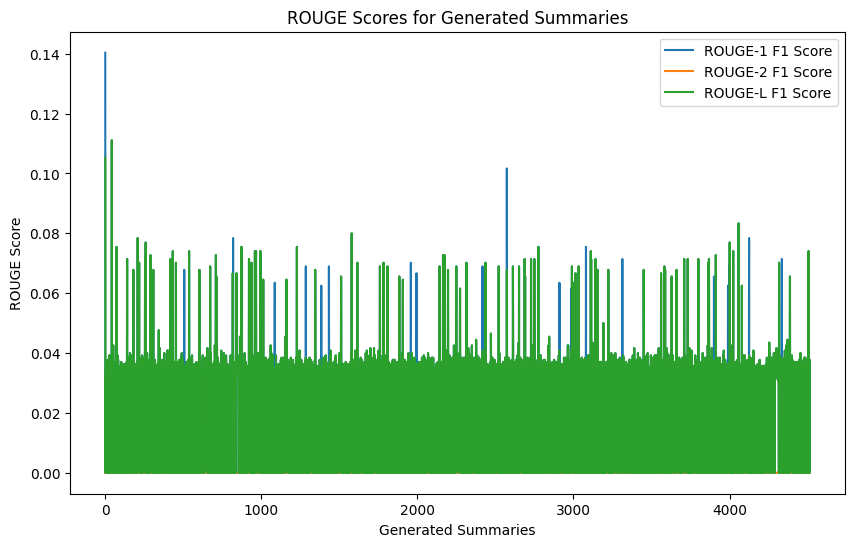

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(reference_summary, generated_summary):
    rouge = Rouge()
    scores = rouge.get_scores(reference_summary, generated_summary)
    return scores

# Lists to store ROUGE scores
rouge_1_scores = []
rouge_2_scores = []
rouge_l_scores = []

# Assuming 'reference_summary' is the reference summary you want to evaluate
reference_summary = test.iloc[0]['highlights']

# Iterate over articles
for article in test['article']:
    # Calculate ROUGE scores for each article against the reference summary
    rouge_scores = calculate_rouge_scores(reference_summary, article)

    # Append ROUGE scores to respective lists
    rouge_1_scores.append(rouge_scores[0]['rouge-1']['f'])
    rouge_2_scores.append(rouge_scores[0]['rouge-2']['f'])
    rouge_l_scores.append(rouge_scores[0]['rouge-l']['f'])

# Plotting ROUGE scores
plt.figure(figsize=(10, 6))
plt.plot(rouge_1_scores, label='ROUGE-1 F1 Score')
plt.plot(rouge_2_scores, label='ROUGE-2 F1 Score')
plt.plot(rouge_l_scores, label='ROUGE-L F1 Score')
plt.xlabel('Generated Summaries')
plt.ylabel('ROUGE Score')
plt.title('ROUGE Scores for Generated Summaries')
plt.legend()
plt.show()


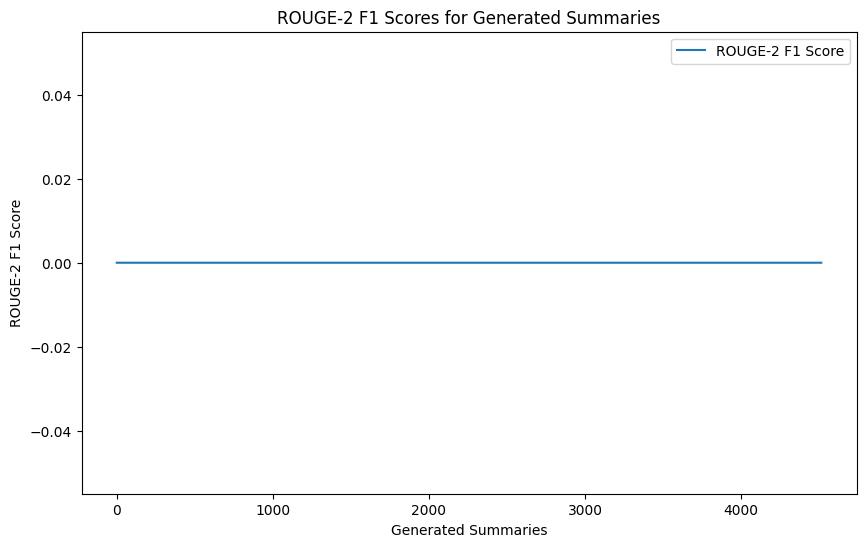

In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(reference_summary, generated_summary):
    rouge = Rouge()
    scores = rouge.get_scores(reference_summary, generated_summary)
    return scores[0]['rouge-2']['f']  # Return only ROUGE-2 F1 score

# List to store ROUGE-2 F1 scores
rouge_2_scores = []

# Assuming 'reference_summary' is the reference summary you want to evaluate
reference_summary = test.iloc[0]['highlights']

# Iterate over articles
for article in test['article']:
    # Calculate ROUGE-2 F1 score for each article against the reference summary
    rouge_2_score = calculate_rouge_scores(reference_summary, article)

    # Append ROUGE-2 F1 score to list
    rouge_2_scores.append(rouge_2_score)

# Plotting ROUGE-2 F1 scores
plt.figure(figsize=(10, 6))
plt.plot(rouge_2_scores, label='ROUGE-2 F1 Score')
plt.xlabel('Generated Summaries')
plt.ylabel('ROUGE-2 F1 Score')
plt.title('ROUGE-2 F1 Scores for Generated Summaries')
plt.legend()
plt.show()


In [ ]:
from rouge import Rouge

def calculate_rouge_scores(y_test_subset, data_2):
    rouge = Rouge()
    scores = rouge.get_scores(data_2, y_test_subset)
    return scores

# Assuming you have a reference summary in your test dataframe, let's say in the 'target_text' column
reference_summary = test.iloc[0]['highlights']

# Assuming 'summary' is the generated summary you want to evaluate
rouge_scores = calculate_rouge_scores(reference_summary, summary)

# Print the Rouge scores
print("ROUGE-1 F1 Score:", rouge_scores[0]['rouge-1']['f'])
print("ROUGE-2 F1 Score:", rouge_scores[0]['rouge-2']['f'])
print("ROUGE-L F1 Score:", rouge_scores[0]['rouge-l']['f'])


In [ ]:
from rouge import Rouge
import matplotlib.pyplot as plt

def calculate_rouge_scores(hypotheses, references):
    rouge = Rouge()
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

def visualize_rouge(scores):
    metrics = ['rouge-1', 'rouge-2', 'rouge-l']
    values = [scores[metric]['f'] * 100 for metric in metrics]

    plt.bar(metrics, values, color=['blue', 'green', 'orange'])
    plt.ylabel('ROUGE F1 Score (%)')
    plt.title('ROUGE Scores for SimpleT5 Model')
    plt.ylim(0, 100)
    plt.show()

# Example usage
hypotheses = ["Generated summary 1", "Generated summary 2", "Generated summary 3"]
references = ["Reference summary 1", "Reference summary 2", "Reference summary 3"]

rouge_scores = calculate_rouge_scores(hypotheses, references)
visualize_rouge(rouge_scores)
